# CS6140 Assignment 3: Regression Models Part 1
- Student: Sukhrobbek Ilyosbekov

# Exploratory Data Analysis (EDA) on EPA Vehicle Emissions Data

In this notebook, exploratory data analysis was performed on the EPA vehicle emissions data from the years 2015 to 2024. The goal is to understand the data, identify patterns, and prepare it for regression analysis.

---

**Table of Contents**

1. [Initial Exploration and Summary Statistics](#1)
2. [Data Structure and Missing Values](#2)
3. [Comparing Column Names Across Years](#3)
4. [Distribution of Key Variables](#4)
5. [Correlation Analysis](#5)
6. [Combining Datasets](#6)
7. [Standardizing Continuous Variables](#7)
8. [Temporal Analysis](#8)
9. [Vehicle Manufacturer Analysis](#9)
10. [Creating a Clean Dataset for Regression](#10)


## Setup
In order to run this notebook, we need to have the following libraries installed:
- pandas
- numpy
- matplotlib
- seaborn
- openpyxl

we can install these libraries using the following command:
```bash
pip install pandas numpy matplotlib seaborn openpyxl
```

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_path(relative_path: str) -> str:
    """
    Get the absolute path to a file in the `dataset` directory.

    Args:
        relative_path: The path to the file relative to the `dataset` directory including the file name.

    Returns:
        The full path to the file in the `dataset` directory.

    Examples:
        >>> get_data_path("assignment1/boston_listings.csv")
        'C:/Users/username/assignments/dataset/assignment1/boston_listings.csv'
    """
    return os.path.abspath(os.path.join("../../dataset", relative_path))

## 1. Initial Exploration and Summary Statistics <a id="1"></a>
Load the datasets for all the years and compare the basic summary statistics.

In [2]:
# Define the file paths
csv_files = ["15-testcar.csv", "16-testcar.csv"]
xlsx_files = ["17-testcar.xlsx", "18-testcar.xlsx", "19-testcar.xlsx", 
              "20-testcar.xlsx", "21-testcar.xlsx", "22-testcar.xlsx", 
              "23-testcar.xlsx", "24-testcar.xlsx"]

# Load CSV files
dfs_csv: list[pd.DataFrame] = []
for file in csv_files:
    file_path = get_data_path(f"assignment3/{file}")
    df = pd.read_csv(file_path)
    df["Year"] = "20" + file[:2]  # Extract year from filename
    dfs_csv.append(df)

# Load Excel files
dfs_excel: list[pd.DataFrame] = []
for file in xlsx_files:
    file_path = get_data_path(f"assignment3/{file}")
    df = pd.read_excel(file_path)
    df["Year"] = "20" + file[:2]  # Extract year from filename
    dfs_excel.append(df)

# Add all dataframes to a single list
dfs = dfs_csv + dfs_excel

print("Number of datasets loaded:", len(dfs))
print("The shape of data for each dataset:")
for i, df in enumerate(dfs):
    print(f"Dataset {df["Year"].iloc[0]}: {df.shape}")

print("Few rows of the first dataset:")
display(dfs[0].head())

print("Columns in the dataset:")
print(dfs[0].columns)

Number of datasets loaded: 10
The shape of data for each dataset:
Dataset 2015: (4832, 68)
Dataset 2016: (4650, 68)
Dataset 2017: (4685, 68)
Dataset 2018: (4727, 68)
Dataset 2019: (4719, 68)
Dataset 2020: (4450, 68)
Dataset 2021: (4265, 68)
Dataset 2022: (4493, 68)
Dataset 2023: (4521, 68)
Dataset 2024: (4137, 68)
Few rows of the first dataset:


Model Year Vehicle Manufacturer Name Veh Mfr Code  \
0        2015              aston martin          ASX   
1        2015              aston martin          ASX   
2        2015              aston martin          ASX   
3        2015              aston martin          ASX   
4        2015              aston martin          ASX   

  Represented Test Veh Make Represented Test Veh Model Test Vehicle ID  \
0              Aston Martin                        DB9       143TT1042   
1              Aston Martin                        DB9       143TT1042   
2              Aston Martin                   Rapide S       410TT4202   
3              Aston Martin                   Rapide S       410TT4202   
4              Aston Martin              V12 Vantage S       288TT2087   

   Test Veh Configuration #  Test Veh Displacement (L)  \
0                         0                        5.9   
1                         0                        5.9   
2                         0                        6.0   
3                         0                        6.0   
4                         0                        6.0   

  Actual Tested Testgroup Vehicle Type  ...  Set Coef B (lbf/mph)  \
0            DASXV05.9VH1          Car  ...                0.2990   
1            DASXV05.9VH1          Car  ...                0.2990   
2            FASXV06.0VHB          Car  ...                2.1980   
3            FASXV06.0VHB          Car  ...                2.1980   
4            FASXV06.0VHB          Car  ...                0.4063   

   Set Coef C (lbf/mph**2) Aftertreatment Device Cd  \
0                   0.0192                      TWC   
1                   0.0192                      TWC   
2                   0.0280                      TWC   
3                   0.0280                      TWC   
4                   0.0186                      TWC   

  Aftertreatment Device Desc Police - Emergency Vehicle?  Averaging Group ID  \
0         Three-way catalyst                           N                 NaN   
1         Three-way catalyst                           N                 NaN   
2         Three-way catalyst                           N                 NaN   
3         Three-way catalyst                           N                 NaN   
4         Three-way catalyst                           N                 NaN   

  Averaging Weighting Factor Averaging Method Cd Averging Method Desc  Year  
0                        NaN                   N         No averaging  2015  
1                        NaN                   N         No averaging  2015  
2                        NaN                   N         No averaging  2015  
3                        NaN                   N         No averaging  2015  
4                        NaN                   N         No averaging  2015  

[5 rows x 68 columns]

Columns in the dataset:
Index(['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code',
       'Represented Test Veh Make', 'Represented Test Veh Model',
       'Test Vehicle ID', 'Test Veh Configuration #',
       'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type',
       'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code',
       'Tested Transmission Type Code', 'Tested Transmission Type',
       '# of Gears', 'Transmission Lockup?', 'Drive System Code',
       'Drive System Description', 'Transmission Overdrive Code',
       'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)',
       'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd',
       'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator',
       'Analytically Derived FE?', 'ADFE Test Number',
       'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)',
       'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description',
       'Test Fuel Type Cd', '

There are total **10** datasets for the years **2015** to **2024**. Loaded all datasets and stored them in the list `dfs`.

All datasets have the same **68** columns, but the number of rows varies across years and it is in range from 4000 to 5000.

In [3]:
# Calculate summary statistics for "Test Veh Displacement (L)" and "Set Coef A (lbf)" in each dataset
for df in dfs:
    year = df["Year"].iloc[0]
    print(f"Summary Statistics for Year {year}:")
    print(df[["Test Veh Displacement (L)", "Set Coef A (lbf)"]].describe())
    print("\n")

Summary Statistics for Year 2015:
       Test Veh Displacement (L)  Set Coef A (lbf)
count                4832.000000       4832.000000
mean                    3.334225         12.015613
std                     4.992816         10.256352
min                     0.001000        -28.100000
25%                     2.000000          6.119000
50%                     3.000000         12.117000
75%                     3.700000         19.010250
max                    99.999000        150.200000


Summary Statistics for Year 2016:
       Test Veh Displacement (L)  Set Coef A (lbf)
count                4650.000000       4650.000000
mean                    3.234766         12.148468
std                     5.084566          9.498626
min                     0.001000        -30.012000
25%                     2.000000          6.342500
50%                     2.967000         12.364000
75%                     3.600000         18.840000
max                    99.999000         60.600000


Summary St

The summary statistics, including the mean, median, standard deviation (std), min, max, and quartiles (25th percentile, 50th percentile, and 75th percentile) for each year, are important for understanding the spread and distribution of the data.

- **Mean (Average)**: Indicates the central tendency of the data. A higher mean in "Test Veh Displacement (L)" suggests that, on average, vehicle engines had larger displacements in certain years.
- **Standard Deviation (Std)**: Reflects the variability in the data. A higher standard deviation means the data points are more spread out from the mean.
- **Min/Max**: These values help detect potential outliers. For example, a "Test Veh Displacement" value of 99.999L is likely an outlier, as it"s an extreme value compared to typical vehicle engine sizes.
- **Quartiles (25th, 50th, 75th Percentile)**: These provide insights into the spread of the data. The 25th percentile (Q1) and 75th percentile (Q3) give a range where the middle 50% of the data lie.

For instance, in **2020**, the 25th percentile for "Test Veh Displacement (L)" is 2.000, while the 75th percentile is 3.500, showing that most vehicles in that year had a displacement between these values.

### Detecting Outliers and Anomalies
The IQR and z-score methods were used to detect outliers in the continuous variables. The IQR method identifies outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. The z-score method identifies outliers as values that fall below the mean - 3 * standard deviation or above the mean + 3 * standard deviation.

Outliers for year 2015:
Test Veh Displacement (IQR method): 84 outliers
Set Coef A (IQR method): 95 outliers
Test Veh Displacement (Z-score method): 12 outliers
Set Coef A (Z-score method): 51 outliers



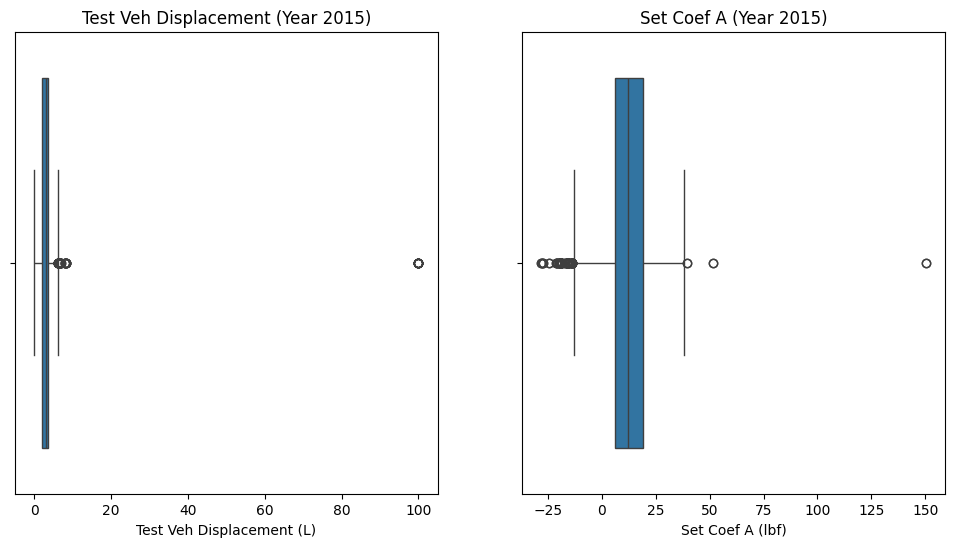

Outliers for year 2016:
Test Veh Displacement (IQR method): 135 outliers
Set Coef A (IQR method): 60 outliers
Test Veh Displacement (Z-score method): 12 outliers
Set Coef A (Z-score method): 29 outliers



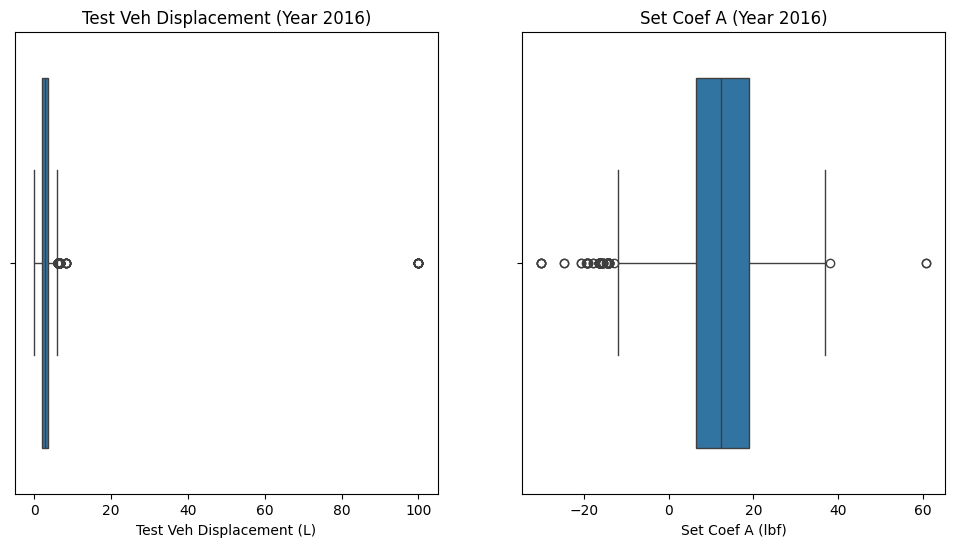

Outliers for year 2017:
Test Veh Displacement (IQR method): 194 outliers
Set Coef A (IQR method): 105 outliers
Test Veh Displacement (Z-score method): 10 outliers
Set Coef A (Z-score method): 33 outliers



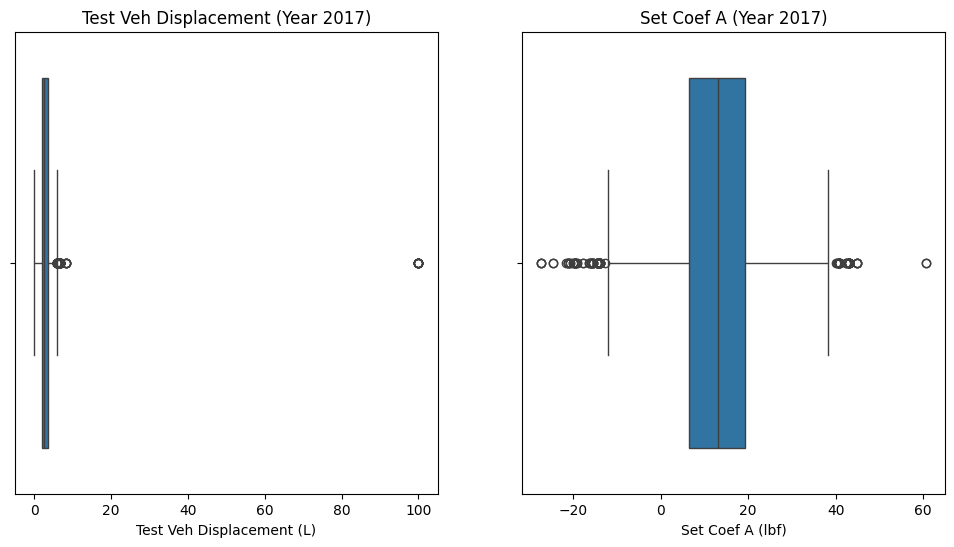

Outliers for year 2018:
Test Veh Displacement (IQR method): 208 outliers
Set Coef A (IQR method): 119 outliers
Test Veh Displacement (Z-score method): 18 outliers
Set Coef A (Z-score method): 40 outliers



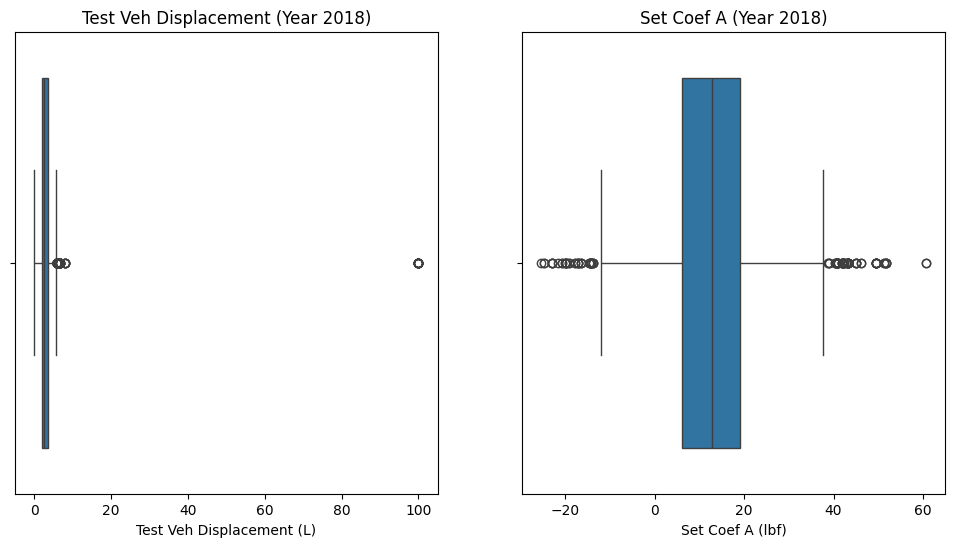

Outliers for year 2019:
Test Veh Displacement (IQR method): 188 outliers
Set Coef A (IQR method): 186 outliers
Test Veh Displacement (Z-score method): 22 outliers
Set Coef A (Z-score method): 57 outliers



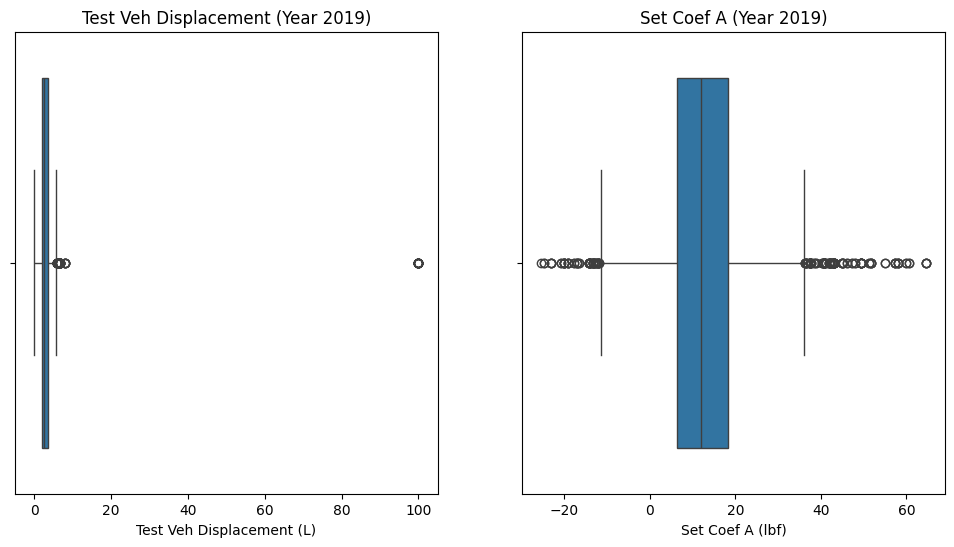

Outliers for year 2020:
Test Veh Displacement (IQR method): 196 outliers
Set Coef A (IQR method): 170 outliers
Test Veh Displacement (Z-score method): 18 outliers
Set Coef A (Z-score method): 51 outliers



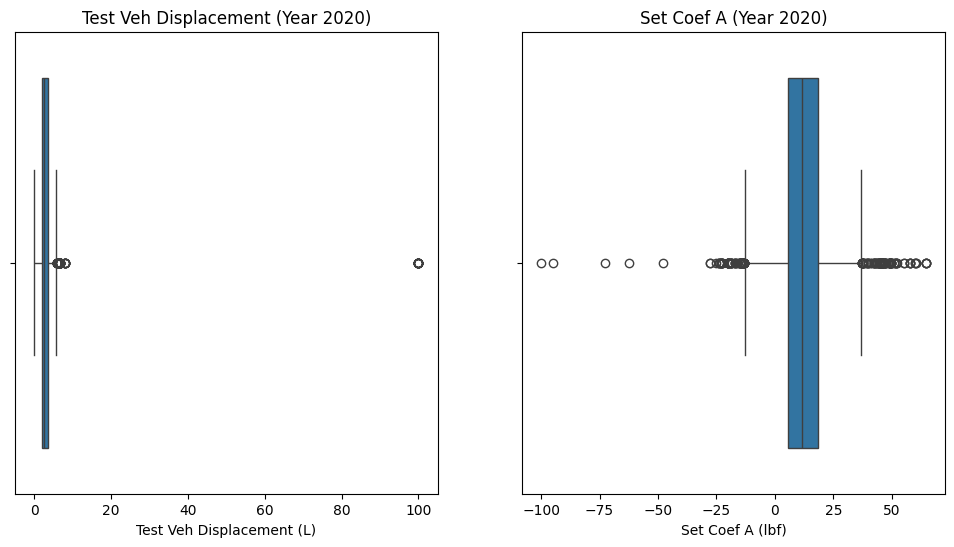

Outliers for year 2021:
Test Veh Displacement (IQR method): 212 outliers
Set Coef A (IQR method): 243 outliers
Test Veh Displacement (Z-score method): 16 outliers
Set Coef A (Z-score method): 51 outliers



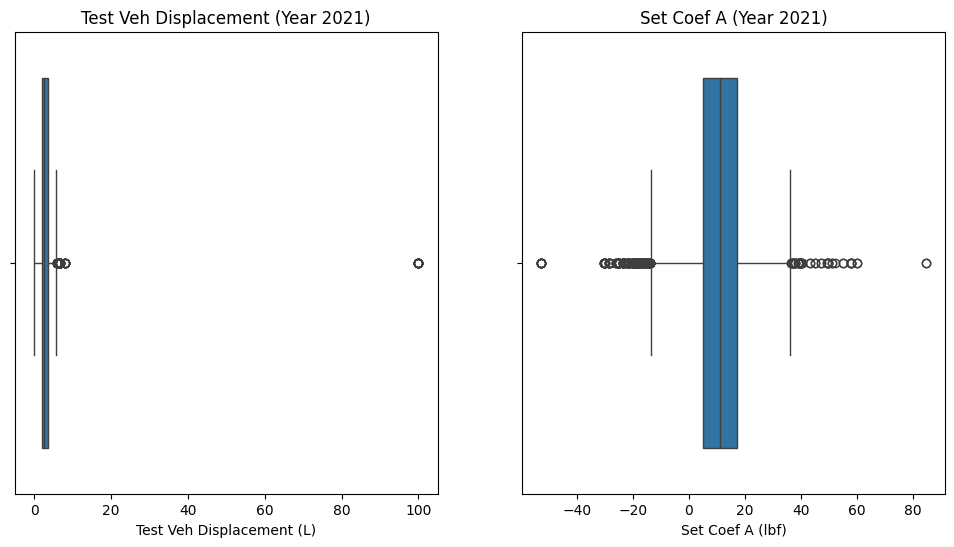

Outliers for year 2022:
Test Veh Displacement (IQR method): 228 outliers
Set Coef A (IQR method): 121 outliers
Test Veh Displacement (Z-score method): 20 outliers
Set Coef A (Z-score method): 48 outliers



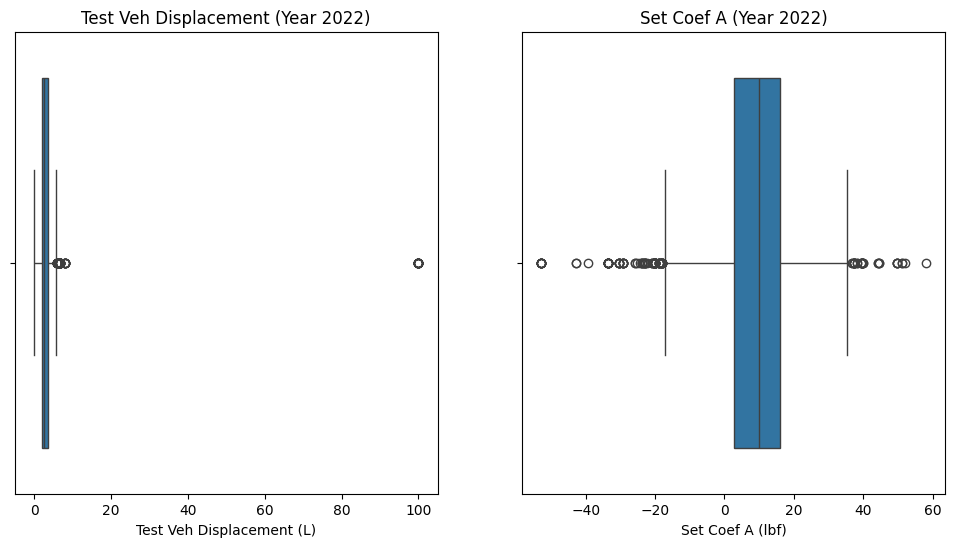

Outliers for year 2023:
Test Veh Displacement (IQR method): 244 outliers
Set Coef A (IQR method): 97 outliers
Test Veh Displacement (Z-score method): 54 outliers
Set Coef A (Z-score method): 43 outliers



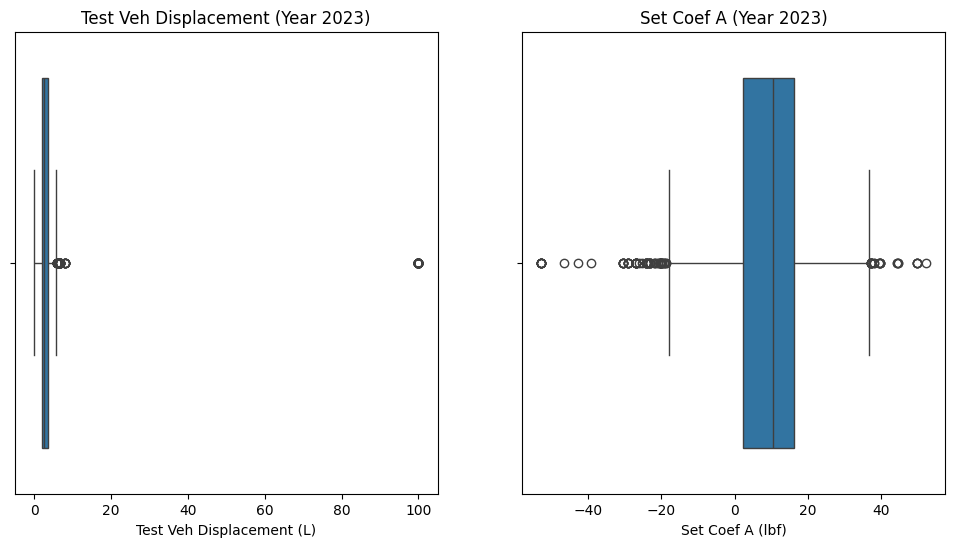

Outliers for year 2024:
Test Veh Displacement (IQR method): 223 outliers
Set Coef A (IQR method): 112 outliers
Test Veh Displacement (Z-score method): 59 outliers
Set Coef A (Z-score method): 39 outliers



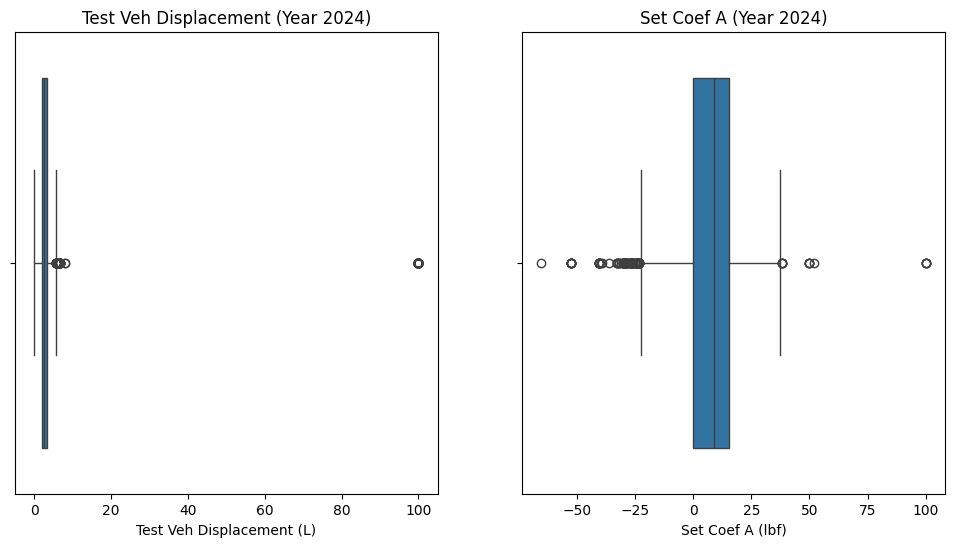

In [4]:
from matplotlib.axes import Axes

def detect_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)] # type: ignore

def detect_outliers_zscore(df: pd.DataFrame, column: str, threshold=3) -> pd.DataFrame:
    mean = np.mean(df[column])
    std = np.std(df[column])
    z_scores = (df[column] - mean) / std # type: ignore
    return df[np.abs(z_scores) > threshold]

# Loop through each dataset and apply outlier detection
for i, df in enumerate(dfs):
    year = df["Year"].iloc[0]
    
    print(f"Outliers for year {year}:")
    
    # IQR method
    displacement_outliers_iqr = detect_outliers_iqr(df, "Test Veh Displacement (L)")
    coef_a_outliers_iqr = detect_outliers_iqr(df, "Set Coef A (lbf)")
    print(f"Test Veh Displacement (IQR method): {len(displacement_outliers_iqr)} outliers")
    print(f"Set Coef A (IQR method): {len(coef_a_outliers_iqr)} outliers")
    
    # Z-score method
    displacement_outliers_z = detect_outliers_zscore(df, "Test Veh Displacement (L)")
    coef_a_outliers_z = detect_outliers_zscore(df, "Set Coef A (lbf)")
    print(f"Test Veh Displacement (Z-score method): {len(displacement_outliers_z)} outliers")
    print(f"Set Coef A (Z-score method): {len(coef_a_outliers_z)} outliers\n")

    # Plot the boxplot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax: tuple[Axes, Axes]

    sns.boxplot(x=df["Test Veh Displacement (L)"], ax=ax[0])
    ax[0].set_title(f"Test Veh Displacement (Year {year})")
    sns.boxplot(x=df["Set Coef A (lbf)"], ax=ax[1])
    ax[1].set_title(f"Set Coef A (Year {year})")
    plt.show()

### Detailed Interpretation of Outliers Detected in "Test Veh Displacement (L)" and "Set Coef A (lbf)"

The outlier detection was performed using two methods: the **Interquartile Range (IQR) method** and the **Z-score method**. Both methods are useful for identifying potential anomalies, but they differ in how they define an outlier. Below, we analyze the results from both methods for each variable across different years and interpret the key points.

### **Outliers Detected in "Test Veh Displacement (L)"**

#### **IQR Method Results**:
- **Year 2015**: 84 outliers
- **Year 2016**: 135 outliers
- **Year 2017**: 194 outliers
- **Year 2018**: 208 outliers
- **Year 2019**: 188 outliers
- **Year 2020**: 196 outliers
- **Year 2021**: 212 outliers
- **Year 2022**: 228 outliers
- **Year 2023**: 244 outliers
- **Year 2024**: 223 outliers

#### **Z-score Method Results**:
- **Year 2015**: 12 outliers
- **Year 2016**: 12 outliers
- **Year 2017**: 10 outliers
- **Year 2018**: 18 outliers
- **Year 2019**: 22 outliers
- **Year 2020**: 18 outliers
- **Year 2021**: 16 outliers
- **Year 2022**: 20 outliers
- **Year 2023**: 54 outliers
- **Year 2024**: 59 outliers

#### **Key Observations and Interpretation for "Test Veh Displacement (L)"**:
1. **IQR Method** consistently detects a higher number of outliers than the Z-score method. This indicates that the IQR method is more sensitive to detecting data points that fall outside the interquartile range, particularly those that are significantly larger or smaller than the typical values.
   
2. **Increasing Number of Outliers Over Time (IQR Method)**: 
   - There is a clear upward trend in the number of outliers detected using the IQR method, from **84 outliers in 2015** to **244 outliers in 2023**. This could indicate greater variability in vehicle engine sizes in more recent years. The increase in large-displacement vehicles, such as trucks and SUVs, may account for this pattern.
   - The peak in outliers in **2023** suggests that this year had the highest number of vehicles with unusually large or small displacements, potentially due to changes in vehicle types, new models, or testing methods.

3. **Z-score Method"s Conservative Detection**: 
   - The Z-score method is more conservative, identifying far fewer outliers. This method is stricter, only flagging data points that are several standard deviations away from the mean.
   - The **2015-2020** period shows relatively stable and low counts of outliers (between **10 and 22 outliers**), but **2023 and 2024** show a sharp increase (with **54 and 59 outliers**, respectively). This indicates an increase in vehicles with extremely large or small engine sizes in recent years.
   
4. **Extreme Values (Max/Min)**: The presence of extreme values like **99.999 L** as the maximum in several years suggests potential data entry errors or highly unusual vehicles (e.g., prototype or experimental models). These need to be verified or removed, as they could distort further analysis.

---

### **Outliers Detected in "Set Coef A (lbf)"**

#### **IQR Method Results**:
- **Year 2015**: 95 outliers
- **Year 2016**: 60 outliers
- **Year 2017**: 105 outliers
- **Year 2018**: 119 outliers
- **Year 2019**: 186 outliers
- **Year 2020**: 170 outliers
- **Year 2021**: 243 outliers
- **Year 2022**: 121 outliers
- **Year 2023**: 97 outliers
- **Year 2024**: 112 outliers

#### **Z-score Method Results**:
- **Year 2015**: 51 outliers
- **Year 2016**: 29 outliers
- **Year 2017**: 33 outliers
- **Year 2018**: 40 outliers
- **Year 2019**: 57 outliers
- **Year 2020**: 51 outliers
- **Year 2021**: 51 outliers
- **Year 2022**: 48 outliers
- **Year 2023**: 43 outliers
- **Year 2024**: 39 outliers

#### **Key Observations and Interpretation for "Set Coef A (lbf)"**:
1. **Fluctuation in IQR Outliers**: 
   - The IQR method detects a fluctuating number of outliers, with significant peaks in **2019 (186 outliers)** and **2021 (243 outliers)**.
   - These fluctuations suggest that certain years had more vehicles with unusual aerodynamic properties (i.e., extreme coefficients). This could be due to new vehicle designs or aerodynamic testing methods.

2. **Consistent Detection by Z-score**:
   - The Z-score method consistently detects fewer outliers compared to the IQR method, identifying around **29 to 57 outliers** per year. This suggests that while the data has variability, only a limited number of vehicles have extreme coefficient values far from the mean.
   
3. **High Outliers in 2019 and 2021 (IQR Method)**:
   - The peak in **2019 (186 outliers)** and **2021 (243 outliers)** using the IQR method could be indicative of certain vehicle models that deviated significantly from the norm in terms of aerodynamic properties (high drag coefficients).
   - This may reflect changes in vehicle design or testing standards during these years, or the introduction of larger, less aerodynamic vehicles into the dataset.
   
4. **Potential Data Entry Errors**: The presence of **negative values** in "Set Coef A (lbf)" (e.g., **-52.8 lbf** in some years) might indicate incorrect data or measurement anomalies, as coefficient A represents a drag coefficient, which is typically a positive value. These negative values should be flagged and reviewed for correctness.



## 2. Data Structure and Missing Values <a id="2"></a>

In [5]:
# Check data structure for each dataset
for df in dfs:
    year = df["Year"].iloc[0]
    print(f"Data Structure for Year {year}:")
    print(df.info())
    print("\n")

# Check for missing values in each dataset
for df in dfs:
    year = df["Year"].iloc[0]
    print(f"Missing Values for Year {year}:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    print("\n")

Data Structure for Year 2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Model Year                      4832 non-null   int64  
 1   Vehicle Manufacturer Name       4832 non-null   object 
 2   Veh Mfr Code                    4832 non-null   object 
 3   Represented Test Veh Make       4832 non-null   object 
 4   Represented Test Veh Model      4832 non-null   object 
 5   Test Vehicle ID                 4832 non-null   object 
 6   Test Veh Configuration #        4832 non-null   int64  
 7   Test Veh Displacement (L)       4832 non-null   float64
 8   Actual Tested Testgroup         4832 non-null   object 
 9   Vehicle Type                    4832 non-null   object 
 10  Rated Horsepower                4832 non-null   int64  
 11  # of Cylinders and Rotors       4666 non-null   float64
 12  Engi

#### **Data Structure**
The datasets for each year (from 2015 to 2024) contain a similar structure with approximately 68 columns. These columns represent various vehicle-related metrics such as engine displacement, coefficients for aerodynamic drag, emissions data, and other vehicle performance parameters.

- **Common Columns**: Some common columns across the years include:
  - **Vehicle Manufacturer Name**
  - **Test Veh Displacement (L)**
  - **Set Coef A (lbf)**
  - **Emissions-related columns**: CO2, NOx, PM, THC, CO
  - **Fuel efficiency and road load data**: FE Bag 1 to FE Bag 4, ADFE Test Number
  - **Aerodynamic and mechanical data**: Set Coef A, B, and C, DT-Inertia Work Ratio Rating

The structure is consistent across the datasets, which is beneficial for combining the data for analysis. However, there are significant missing values that need to be addressed.

### **Missing Values Across Each Year**

For each dataset, the following columns have missing values:

#### **Key Columns with Missing Values (Common across Years)**:
1. **# of Cylinders and Rotors**
2. **ADFE Test Number**
3. **ADFE Total Road Load HP**
4. **ADFE Equiv. Test Weight (lbs.)**
5. **ADFE N/V Ratio**
6. **THC (g/mi)**
7. **CO (g/mi)**
8. **CO2 (g/mi)**
9. **NOx (g/mi)**
10. **PM (g/mi)**
11. **CH4 (g/mi)**
12. **N2O (g/mi)**
13. **FE Bag 1 to FE Bag 4**
14. **DT-Inertia Work Ratio Rating**
15. **DT-Absolute Speed Change Rating**
16. **DT-Energy Economy Rating**
17. **Aftertreatment Device Cd & Desc**
18. **Averaging Group ID & Weighting Factor**

These columns represent important vehicle and emission-related data, and the missing values in these fields will need to be handled carefully for a meaningful analysis.

---

### **Year-wise Missing Data Interpretation**

#### **2015 Dataset**:
- **Highest Missing Values**: The columns with the most missing data are **PM (g/mi)** (missing 4163 out of 4832 rows), **N2O (g/mi)** (missing 2775 rows), and **FE Bags** (Bag 1 to Bag 4 have missing values in more than 2700 rows).
- **Key Insight**: Missing data in emission-related variables, such as **PM, THC, CO2, CO**, and **NOx**, could affect emission trend analysis or regression models. This might reflect incomplete testing in earlier years, making it crucial to decide whether to impute or exclude these variables in future analysis.

#### **2016 Dataset**:
- **Highest Missing Values**: Similar to 2015, key missing columns include **ADFE Test Number** (missing 4184 rows out of 4650), **PM (g/mi)** (3997 missing), and **N2O (g/mi)** (2923 missing).
- **Insight**: The missing emission values, such as **PM, CO2, NOx**, indicate that emission tests were likely not conducted for all vehicles, or these tests had reporting issues.

#### **2017 Dataset**:
- **Highest Missing Values**: The **ADFE fields**, particularly **ADFE Test Number** (4119 rows missing out of 4685), remain the largest missing data category. **PM (g/mi)** is missing in 4058 rows, while **N2O (g/mi)** is missing in 2830 rows.
- **Insight**: The consistency of missing data in these emission-related columns across multiple years suggests a systematic issue in recording or reporting emission data for certain vehicles.

#### **2018 Dataset**:
- **Highest Missing Values**: A similar trend persists, with **ADFE fields** (4187 missing rows) and **PM (g/mi)** (3823 missing rows) being the most affected. 
- **Insight**: The missing emission data, particularly in key pollutants like **PM** and **NOx**, might affect any models predicting vehicle emissions, as these pollutants are critical for analyzing environmental impact.

#### **2019 Dataset**:
- **Highest Missing Values**: The pattern continues with **ADFE fields** and **emission-related columns** like **PM, CO2, NOx, and THC**. For instance, **PM (g/mi)** is missing in **3943 rows** out of 4719.
- **Insight**: The absence of key pollutants and energy ratings (**DT-Inertia Work Ratio Rating**) will impact temporal trend analysis in vehicle performance and emissions.

#### **2020 Dataset**:
- **Highest Missing Values**: The same columns continue to have significant missing data, with **ADFE fields** and **PM (g/mi)** being the most impacted.
- **Insight**: The missing values appear consistent across the years, indicating that these fields were either not measured or not reported for a substantial portion of vehicles.

#### **2021 Dataset**:
- **Highest Missing Values**: The **ADFE fields** have more than 3800 missing rows, while **PM (g/mi)** and **N2O (g/mi)** also have large gaps.
- **Insight**: Despite improvements in vehicle testing, certain emission and aerodynamic measurements remain underreported, likely affecting regression model accuracy if these variables are crucial predictors.

#### **2022 Dataset**:
- **Highest Missing Values**: The trends from earlier years persist, with the **ADFE fields** and **PM (g/mi)** missing in a large portion of the data.
- **Insight**: Handling these missing values through imputation or dropping the variables becomes important to ensure the dataset’s integrity for further analysis.

#### **2023 Dataset**:
- **Highest Missing Values**: The columns with the most missing values continue to be **PM (g/mi)** (3703 rows missing out of 4521) and **ADFE fields**.
- **Insight**: Similar patterns of missing values over the years suggest that these fields are not consistently reported across different vehicle tests. The missing data in important pollution metrics will affect any model attempting to predict emissions or fuel efficiency.

#### **2024 Dataset**:
- **Highest Missing Values**: **ADFE fields** and **PM (g/mi)** continue to have the most missing data. **CO2 (g/mi)** and **NOx (g/mi)** are also missing in a significant number of rows.
- **Insight**: Missing key emission data in the most recent year indicates that certain pollutants were either not measured or that this data was not available during testing.

---

### **Interpretation of Missing Data and Next Steps**

1. **Consistent Missing Data Across Key Emission Variables**: 
   - Columns like **PM (g/mi)**, **NOx (g/mi)**, **THC (g/mi)**, and **CO2 (g/mi)** have consistent missing values across most years. This suggests that certain vehicles were not tested for these pollutants, or the data was not recorded. This will impact models focusing on emission prediction, as some vehicles lack critical information.

2. **Handling Missing Data in ADFE Fields**:
   - The **ADFE fields** (Test Number, Total Road Load HP, Equivalent Test Weight) have missing data in most of the datasets. These fields are related to road load testing, and their absence might affect predictions related to vehicle energy consumption or aerodynamic properties. we might consider removing these columns if they are not central to our analysis or imputing missing values if relevant.

3. **Emission Variables**:
   - The emission variables **THC (g/mi)**, **CO (g/mi)**, **CO2 (g/mi)**, and **NOx (g/mi)** are critical for environmental impact analysis. Since these variables have a high proportion of missing values, we’ll need to decide whether to impute missing values using techniques like **mean/median imputation** or **predictive imputation**, or remove them from further analysis if their contribution is minimal.

4. **FE Bag Data**:
   - The FE Bags (1-4) are related to fuel economy testing across different driving conditions (e.g., city, highway). Missing values in these fields suggest that some vehicles were not tested for fuel efficiency across all driving scenarios. Since fuel economy is a central metric for many analyses, imputing or removing these values will be essential before building models.

5. **Aftertreatment Device Information**:
   - The **Aftertreatment Device** fields (Cd and Desc) have relatively fewer missing values compared to other columns. If this information is important for our analysis, we might choose to impute these values based on vehicle type or engine characteristics.

### **Handling Missing Data**

Given the structure and the nature of the missing values, different strategies can be applied depending on the importance of the columns for wer regression analysis. Here’s how we could handle the missing values:

#### **1. For Columns with Minimal Impact**:
- **ADFE Fields**: Given that these fields (e.g., ADFE Test Number, ADFE Total Road Load HP) are consistently missing across all years, they might not be critical to the regression analysis focused on emissions and fuel economy. We can consider **removing these columns** from analysis.
  
#### **2. For Emission-related Columns**:
- **Imputation for Missing Emission Data**: Since emissions data like **PM, CO2, NOx, and THC** are crucial for understanding environmental impact, imputation techniques can be applied. Possible methods include:
  - **Mean/Median Imputation**: For variables with moderate missingness (e.g., CO2 and NOx), we can impute missing values using the mean or median, which is especially useful if the data distribution is relatively normal.
  - **KNN Imputation**: This technique can be used for columns with more complex relationships (e.g., PM, NOx). KNN imputation uses the nearest neighbors" data to fill in missing values, which can be effective for variables that correlate with other columns.

#### **3. For Aftertreatment Device and Cylinders/Rotors Data**:
- **Drop or Impute**: Since these columns have fewer missing values (compared to emissions data), we can either:
  - Impute missing values using the **most frequent category** or other relevant imputation techniques.
  - Drop rows where these values are missing if they aren’t central to our analysis.

## 3. Comparing Column Names Across Years <a id="3"></a>

In [6]:
# Collect column names for each dataframe
column_names = {}
for df in dfs:
    year = df["Year"].iloc[0]
    column_names[year] = df.columns.tolist()

# Display column names for each year
for year, columns in column_names.items():
    print(f"Columns for Year {year}:")
    print(columns)
    print("\n")


Columns for Year 2015:
['Model Year', 'Vehicle Manufacturer Name', 'Veh Mfr Code', 'Represented Test Veh Make', 'Represented Test Veh Model', 'Test Vehicle ID', 'Test Veh Configuration #', 'Test Veh Displacement (L)', 'Actual Tested Testgroup', 'Vehicle Type', 'Rated Horsepower', '# of Cylinders and Rotors', 'Engine Code', 'Tested Transmission Type Code', 'Tested Transmission Type', '# of Gears', 'Transmission Lockup?', 'Drive System Code', 'Drive System Description', 'Transmission Overdrive Code', 'Transmission Overdrive Desc', 'Equivalent Test Weight (lbs.)', 'Axle Ratio', 'N/V Ratio', 'Shift Indicator Light Use Cd', 'Shift Indicator Light Use Desc', 'Test Number', 'Test Originator', 'Analytically Derived FE?', 'ADFE Test Number', 'ADFE Total Road Load HP', 'ADFE Equiv. Test Weight (lbs.)', 'ADFE N/V Ratio', 'Test Procedure Cd', 'Test Procedure Description', 'Test Fuel Type Cd', 'Test Fuel Type Description', 'Test Category', 'THC (g/mi)', 'CO (g/mi)', 'CO2 (g/mi)', 'NOx (g/mi)', 'PM 

All column names are consistent across the years and there are no missing columns. This consistency will help us combine the datasets easily.

## 4. Distribution of Key Variables <a id="4"></a>

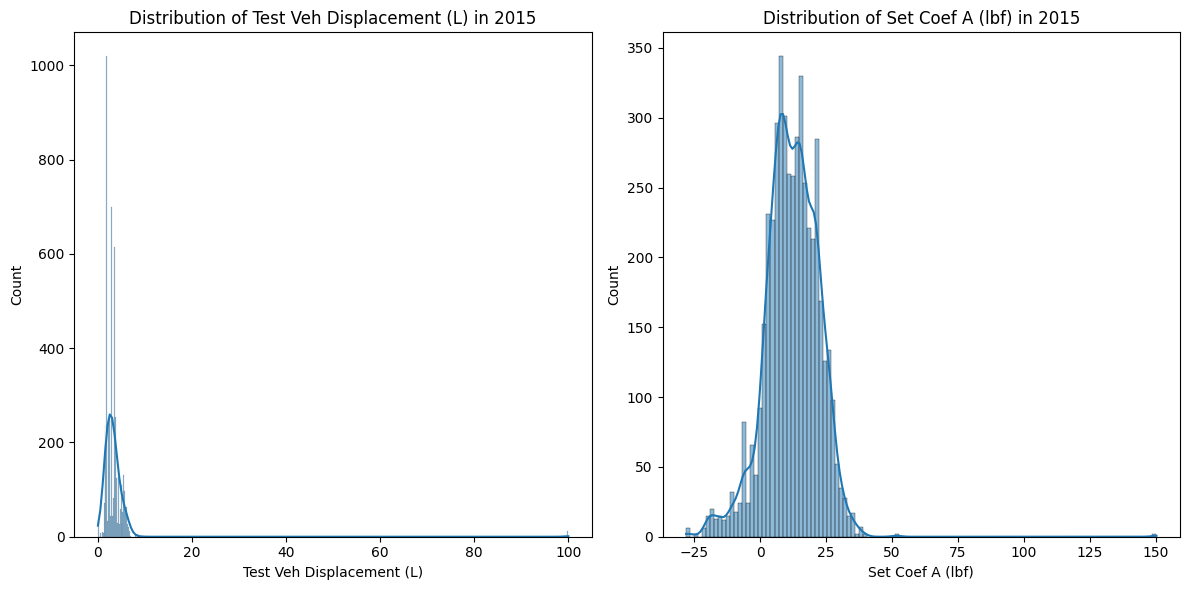

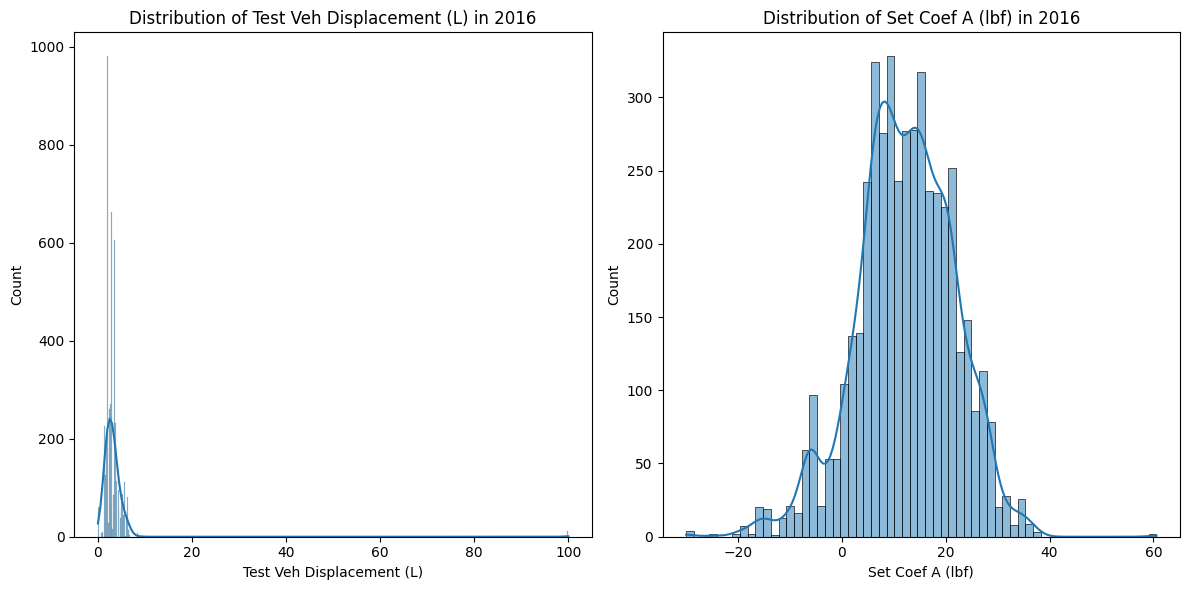

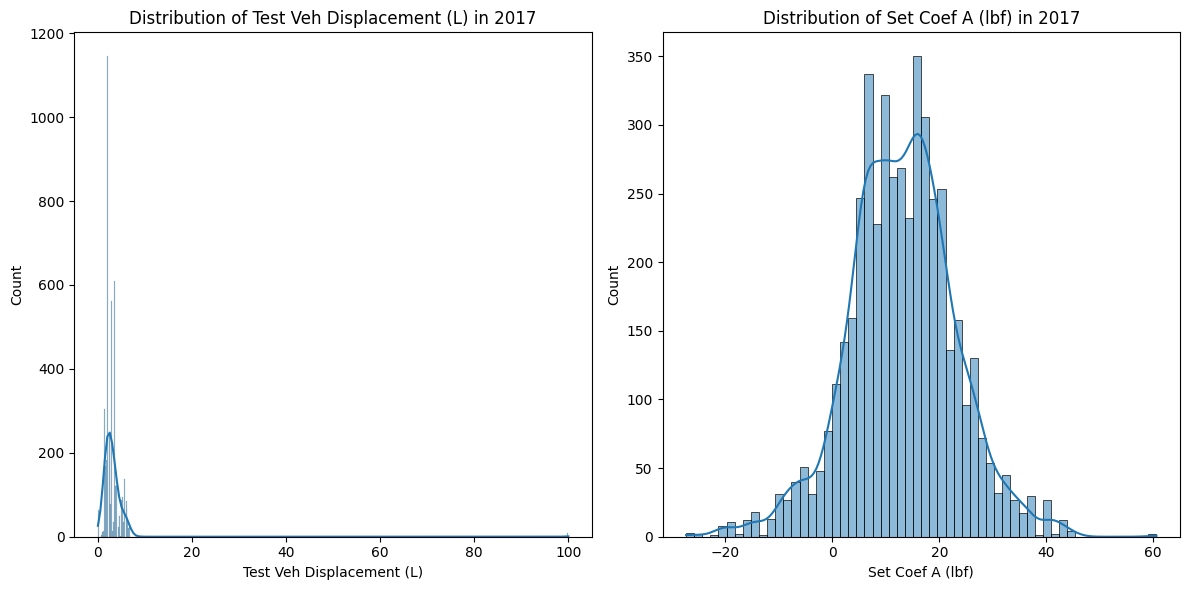

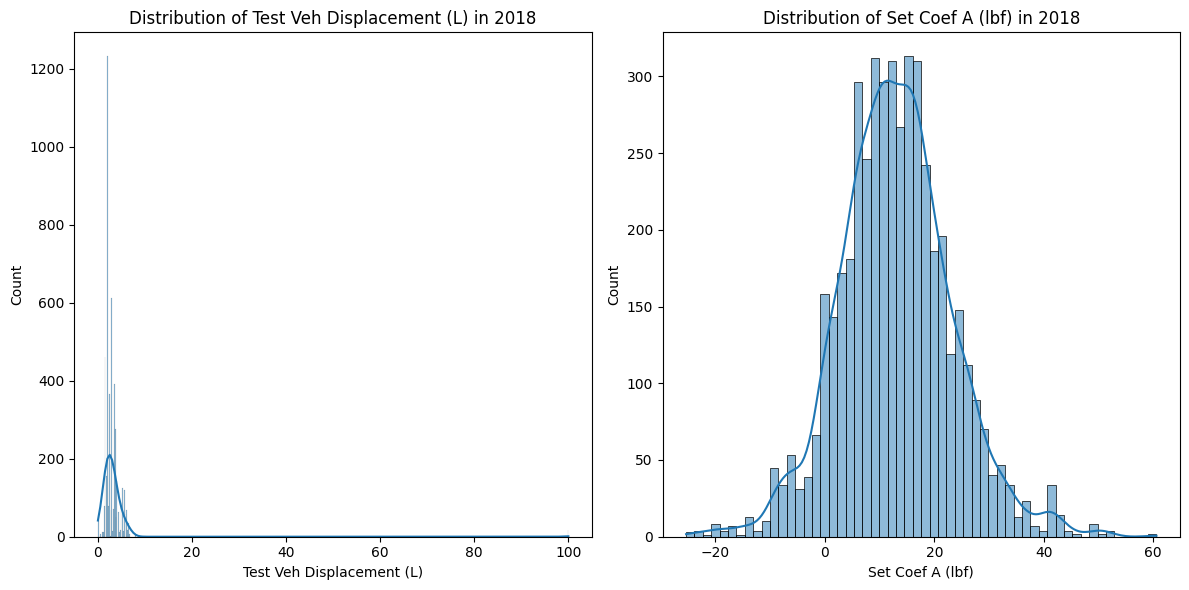

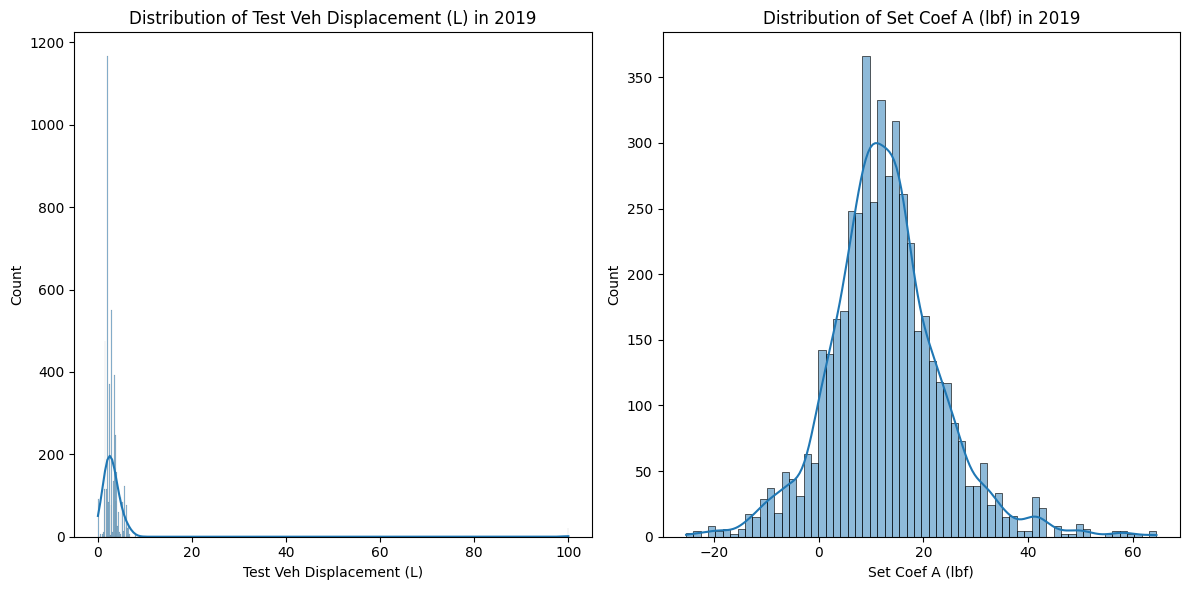

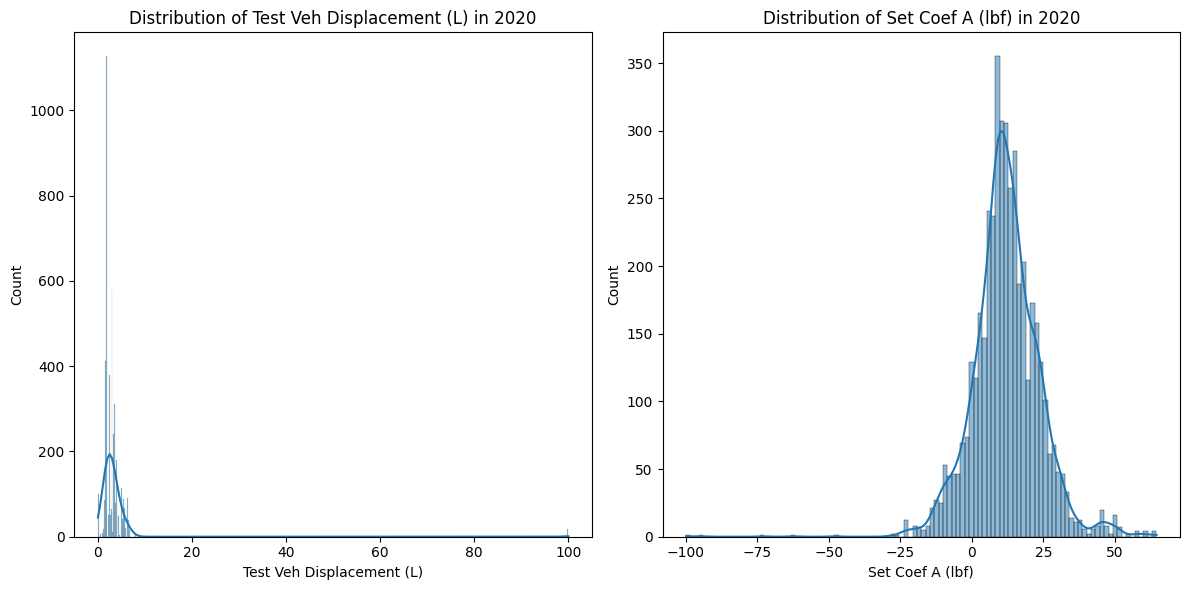

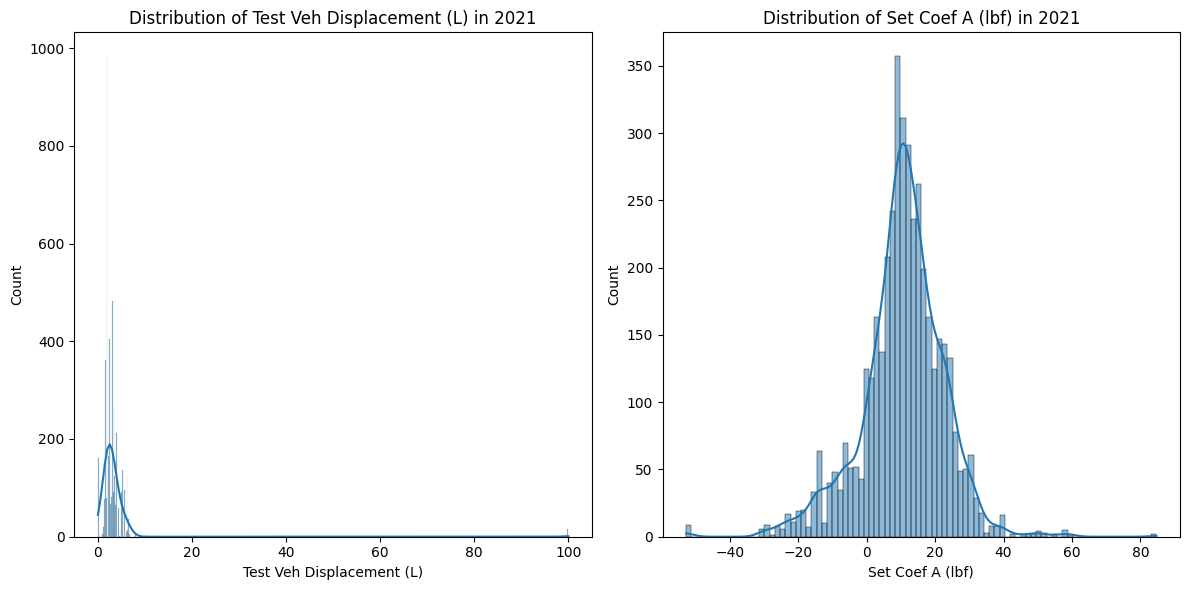

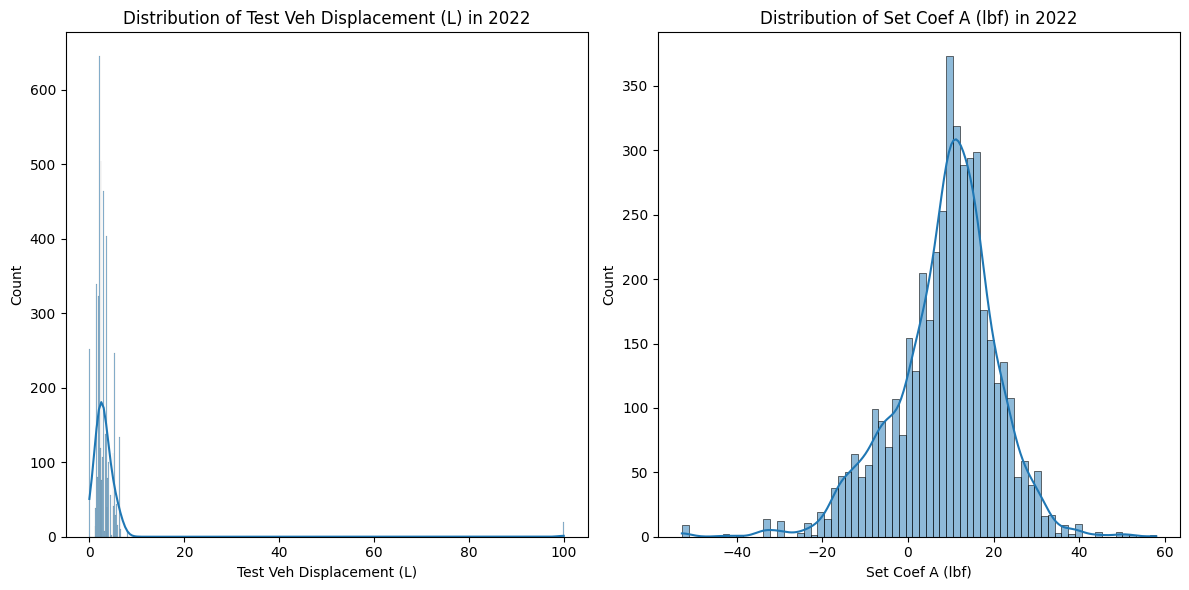

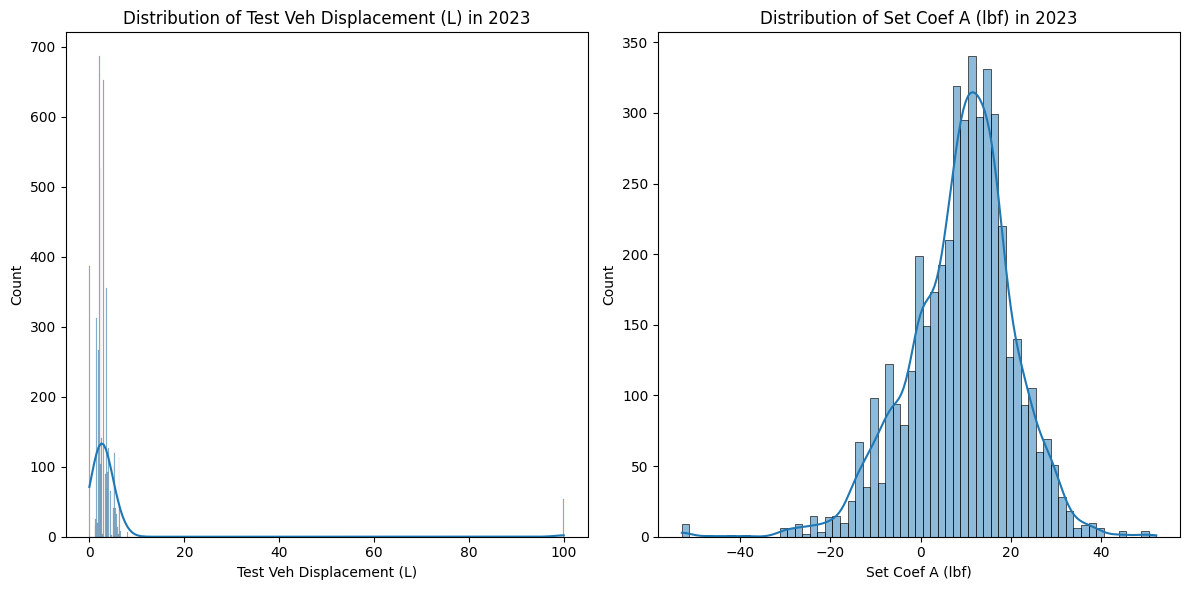

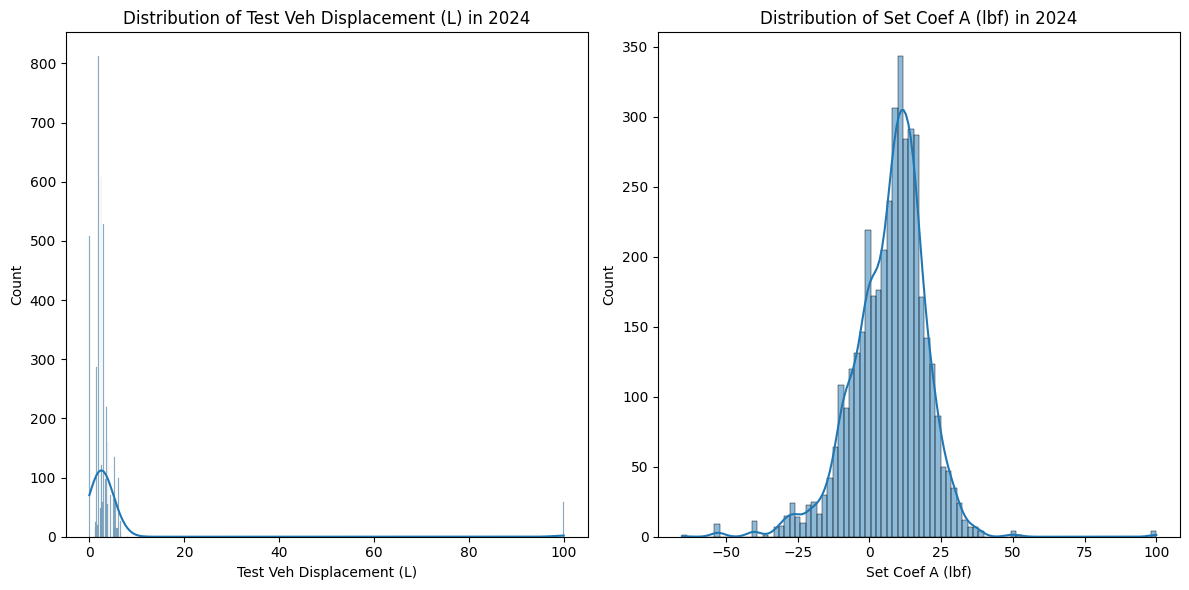

In [7]:
from matplotlib.axes import Axes

# Plot the distribution of "Test Veh Displacement (L)" and "Set Coef A (lbf)" for each year
for df in dfs:
    year = df["Year"].iloc[0]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax: tuple[Axes, Axes]

    sns.histplot(df["Test Veh Displacement (L)"], ax=ax[0], kde=True) # type: ignore
    ax[0].set_title(f"Distribution of Test Veh Displacement (L) in {year}")

    sns.histplot(df["Set Coef A (lbf)"], ax=ax[1], kde=True) # type: ignore
    ax[1].set_title(f"Distribution of Set Coef A (lbf) in {year}")
    
    plt.tight_layout()
    plt.show()


### **Distribution of "Test Veh Displacement (L)"**

#### **Key Observations**:
- **General Shape**: The distribution of "Test Veh Displacement (L)" is generally **right-skewed** for most years, indicating that most vehicles tend to have smaller engine displacements, while a smaller number of vehicles have larger engines.
  
- **Displacement Ranges**:
  - The **bulk** of vehicles have engine displacements ranging from **1.5L to 4.0L**, with a concentration around **2.0L to 3.0L** in most years. These are likely typical passenger cars and smaller SUVs.
  - **Larger vehicles** (e.g., trucks, large SUVs) with displacements greater than **4.0L** are fewer, but consistently present throughout the years. These larger displacement vehicles contribute to the right-skewed nature of the distribution.
  - Extreme values of **99.999L** (which may indicate outliers or errors) are detected in several years but occur infrequently.

#### **Trends Over Time**:
- **Decreasing Displacement Range** (2020-2024):
  - From **2020 onward**, there is a slight **shift toward smaller engine displacements**, suggesting that vehicles with smaller engines are becoming more prevalent. This could be due to the increased adoption of **fuel-efficient technologies** (e.g., turbocharged smaller engines) and stricter **emissions standards**.
  - This trend is visible in the narrowing of the distribution between **2.0L and 3.0L** displacements, with fewer vehicles having very large displacements (> 6.0L).
  
- **Increased Number of Small-Displacement Vehicles**:
  - In recent years (2022-2024), there is an increase in the number of vehicles with **very small displacements** (around **1.0L to 1.5L**). This could be attributed to the rising popularity of **electric vehicles (EVs)**, **hybrids**, and **small, fuel-efficient cars**.
  
- **Consistent Presence of Larger Vehicles**:
  - Although the average engine displacement appears to be shifting downward, larger vehicles (e.g., trucks and SUVs) with displacements around **5.0L to 6.0L** continue to be part of the dataset, reflecting ongoing demand for heavy-duty vehicles in certain market segments.

#### **Visible Trends**:
- **Downsizing Trend**: There is a **clear trend** towards smaller displacement engines from **2020 onwards**, likely due to regulatory pressures, technological advancements, and changing consumer preferences for more fuel-efficient and eco-friendly vehicles.
- **Smaller Engines**: The increase in vehicles with smaller displacements in recent years points towards the **increased adoption of hybrids and electric vehicles**, which are typically characterized by smaller or no internal combustion engines.

---

### **Distribution of "Set Coef A (lbf)"**

#### **Key Observations**:
- **General Shape**: The distribution of "Set Coef A (lbf)" is more **varied** compared to engine displacement, with several years showing multimodal distributions (multiple peaks).
  
- **Coefficient Ranges**:
  - For most years, the values of **"Set Coef A"** are concentrated between **0 lbf** and **30 lbf**, with notable peaks around **5 lbf to 15 lbf**. These values typically represent the aerodynamic drag of smaller, more streamlined vehicles.
  - Some vehicles have **negative values** for "Set Coef A" (as low as **-52.8 lbf** in some years). These negative values are unusual and could represent either data anomalies or measurement errors.
  
#### **Trends Over Time**:
- **Shift Toward Lower Coefficients**:
  - There is a **gradual shift towards lower values** of **Set Coef A** over time, particularly starting in **2020**. The distributions become narrower and more concentrated around smaller values of **Set Coef A**, indicating improvements in vehicle **aerodynamic design**.
  
- **Increased Concentration Around Small Coefficients**:
  - In the **2022-2024** period, the distributions show a higher concentration of vehicles with **Set Coef A** values around **5 lbf to 10 lbf**, which is lower than earlier years (2015-2018). This trend reflects a shift towards more aerodynamic vehicles, which could be a result of manufacturers focusing on reducing drag to improve fuel efficiency and emissions performance.
  
- **Fewer High Drag Vehicles**:
  - Vehicles with high **Set Coef A** values (above **40 lbf**) become less frequent in the later years, especially post-2020. This may indicate that fewer large, less aerodynamic vehicles are being produced, or that manufacturers are prioritizing more aerodynamic designs, even in larger vehicles like trucks and SUVs.
  
#### **Visible Trends**:
- **Aerodynamic Improvements**: There is a **visible trend** towards **lower drag coefficients** (smaller "Set Coef A" values), particularly from **2020 onwards**, which could be attributed to the increased emphasis on **fuel efficiency** and **regulatory requirements** for reducing vehicle emissions.
- **Narrowing Distribution**: The narrowing of the distribution around smaller values of **Set Coef A** reflects a broader industry trend of improving vehicle aerodynamics to comply with stricter environmental regulations and meet consumer demand for more efficient vehicles.

---

### **Summary of Visible Trends in Both Variables**

1. **Shift Towards Smaller Engine Displacements**:
   - The distribution of **Test Veh Displacement (L)** shows a **clear shift towards smaller engines** over time, particularly post-2020. This trend is likely driven by advancements in fuel-efficient technologies, the rise of electric and hybrid vehicles, and stricter emissions regulations.
   
2. **Improved Vehicle Aerodynamics**:
   - The **Set Coef A (lbf)** distributions indicate a trend towards **lower aerodynamic drag coefficients** over the years, especially in recent years. This suggests that vehicle designs are becoming more aerodynamic, reflecting manufacturers’ efforts to meet fuel efficiency and emissions standards.

3. **Visible Impact of Regulations and Technological Advancements**:
   - The patterns in both engine displacement and drag coefficients suggest that the automotive industry is evolving towards more **efficient**, **eco-friendly**, and **streamlined** vehicles. The adoption of smaller, turbocharged engines, electric drivetrains, and better aerodynamic designs reflects these changes.

The analysis of the distributions over time reveals two clear trends: **engine downsizing** and **aerodynamic improvements**. These trends are consistent with broader industry changes aimed at improving fuel efficiency, reducing emissions, and complying with regulatory standards. The increasing number of vehicles with smaller engines and lower drag coefficients reflects a shift in consumer demand and regulatory pressure towards more sustainable automotive technologies.

## 5. Correlation Analysis <a id="5"></a>

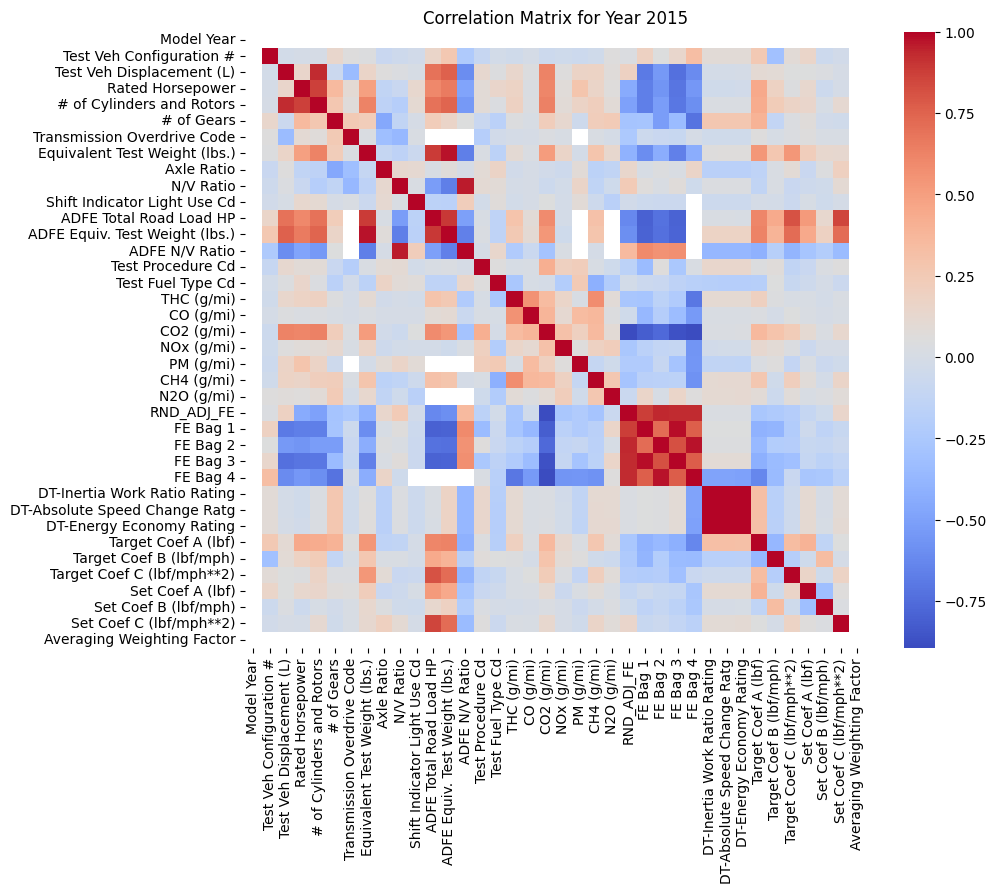

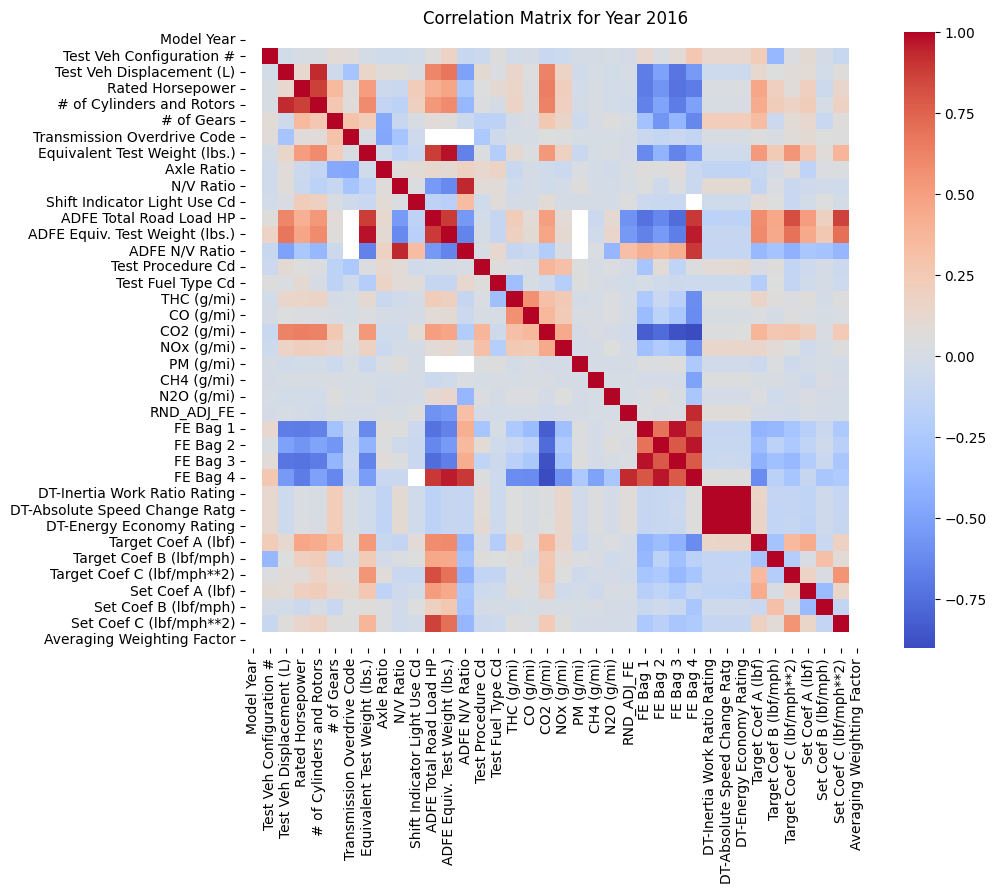

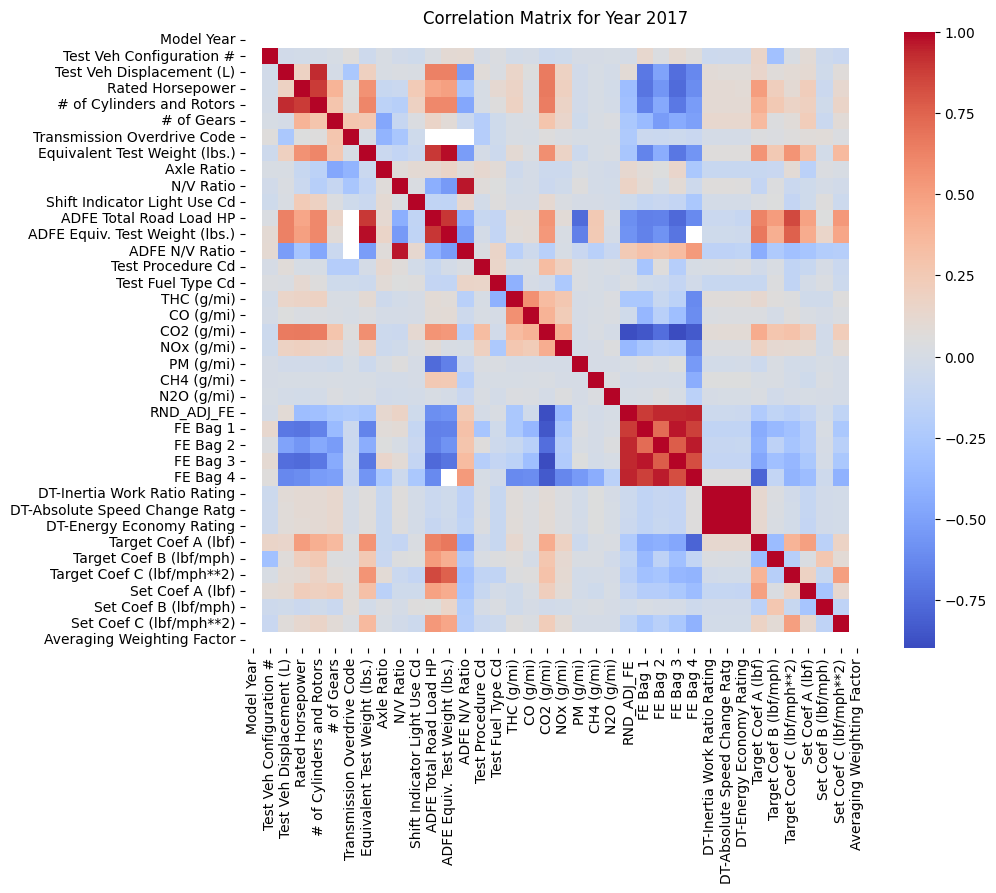

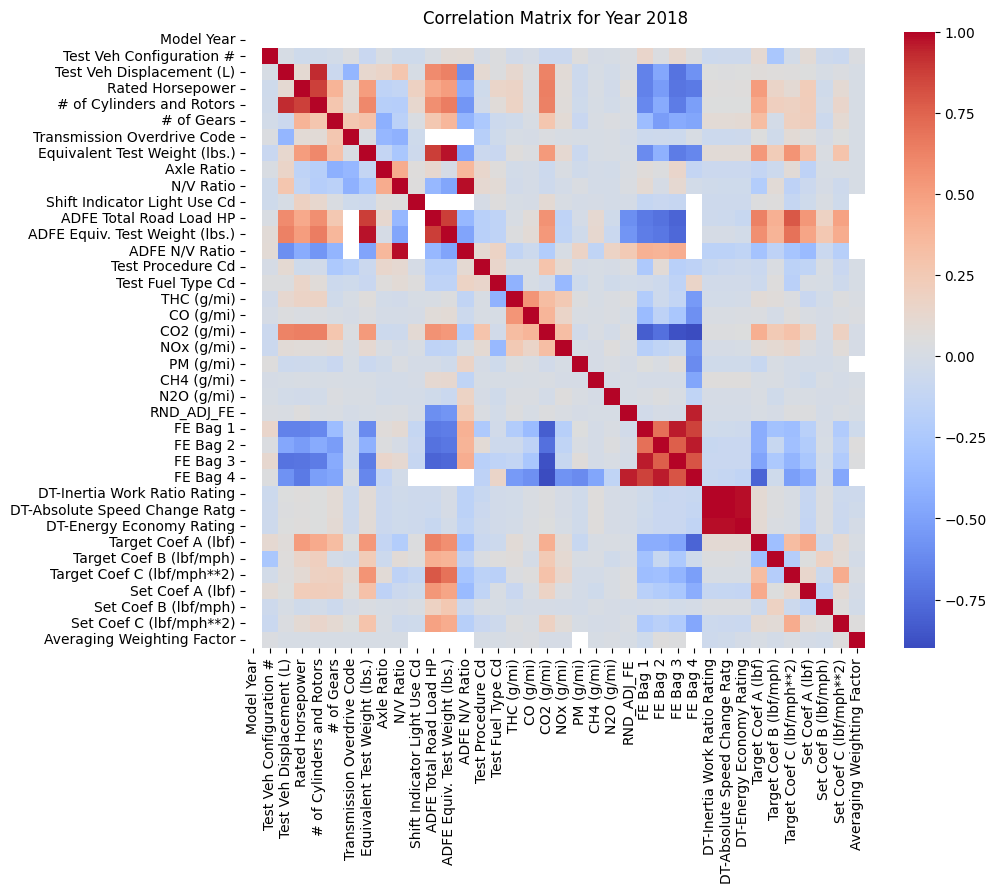

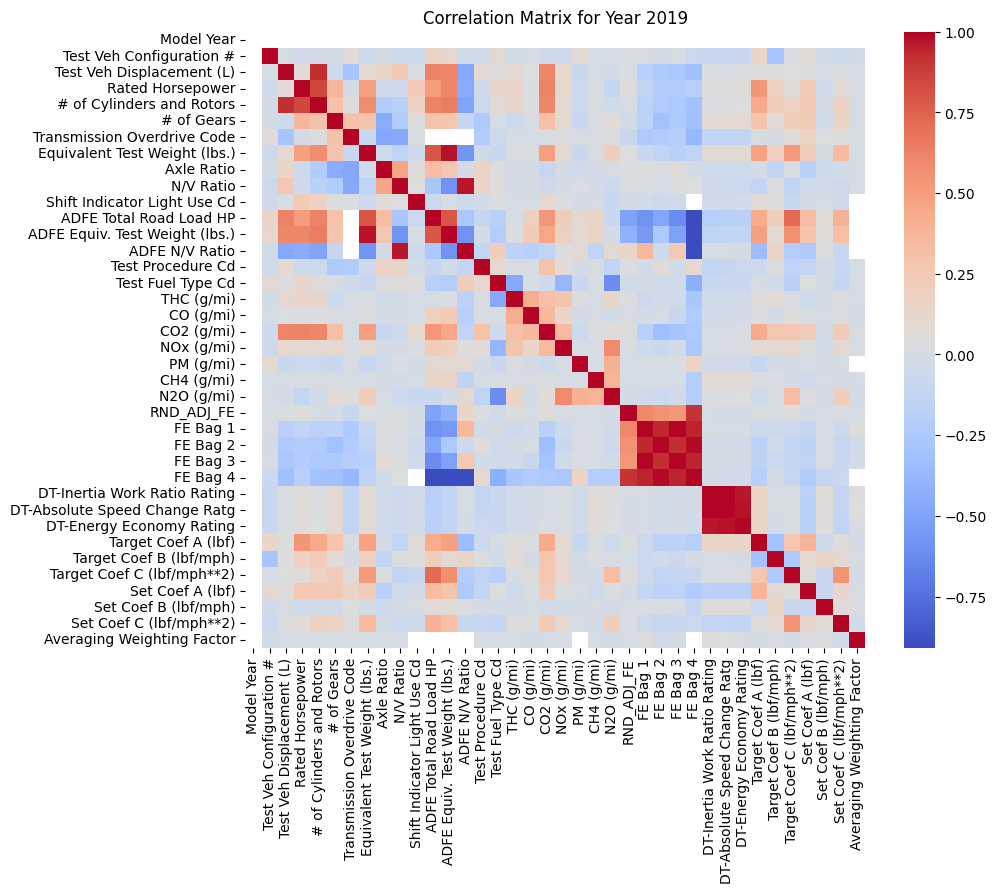

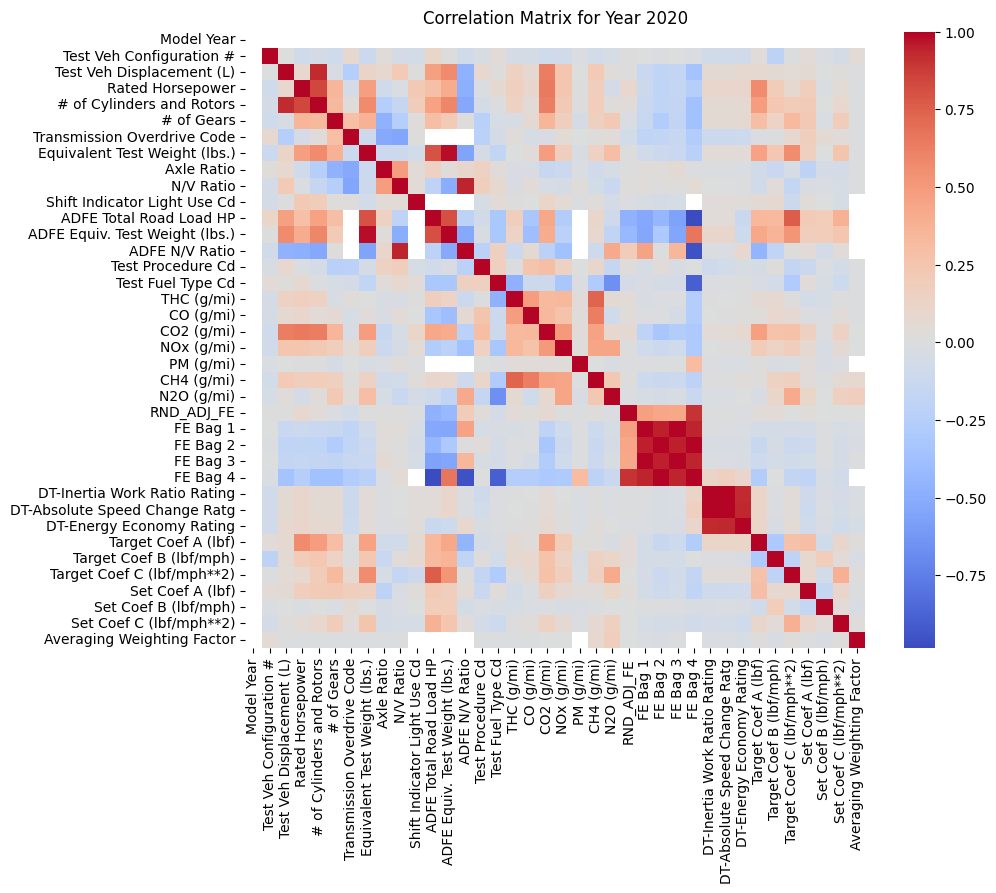

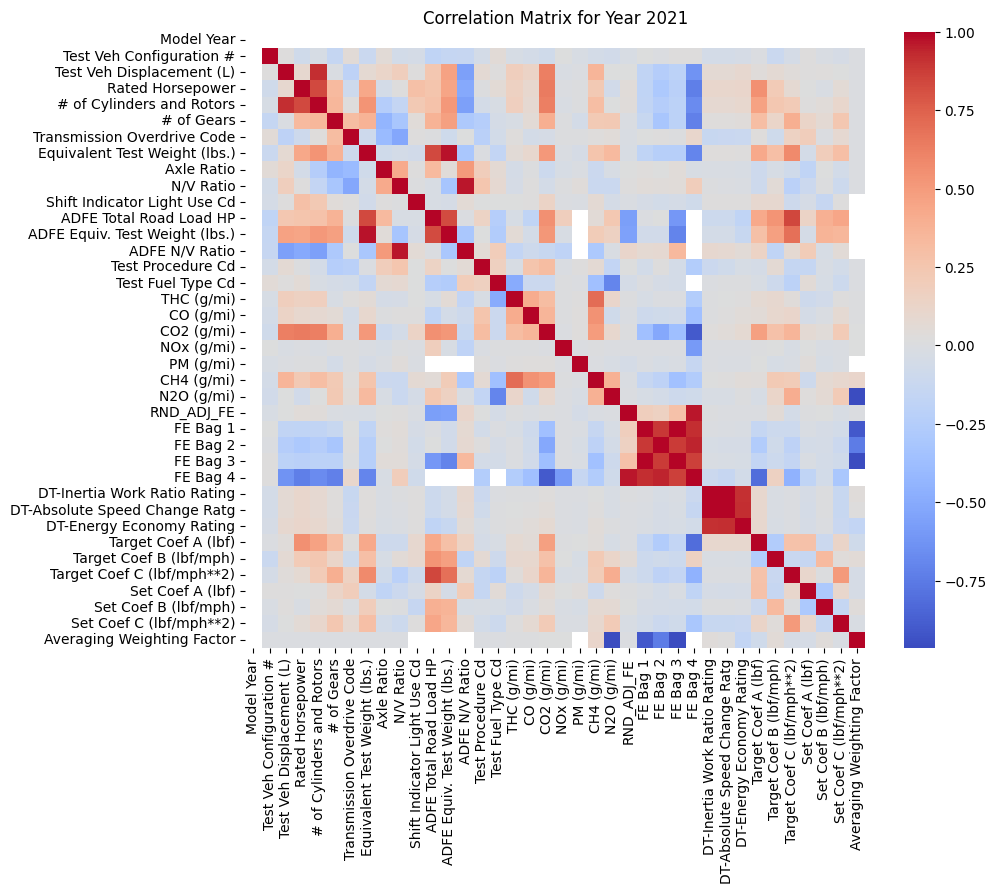

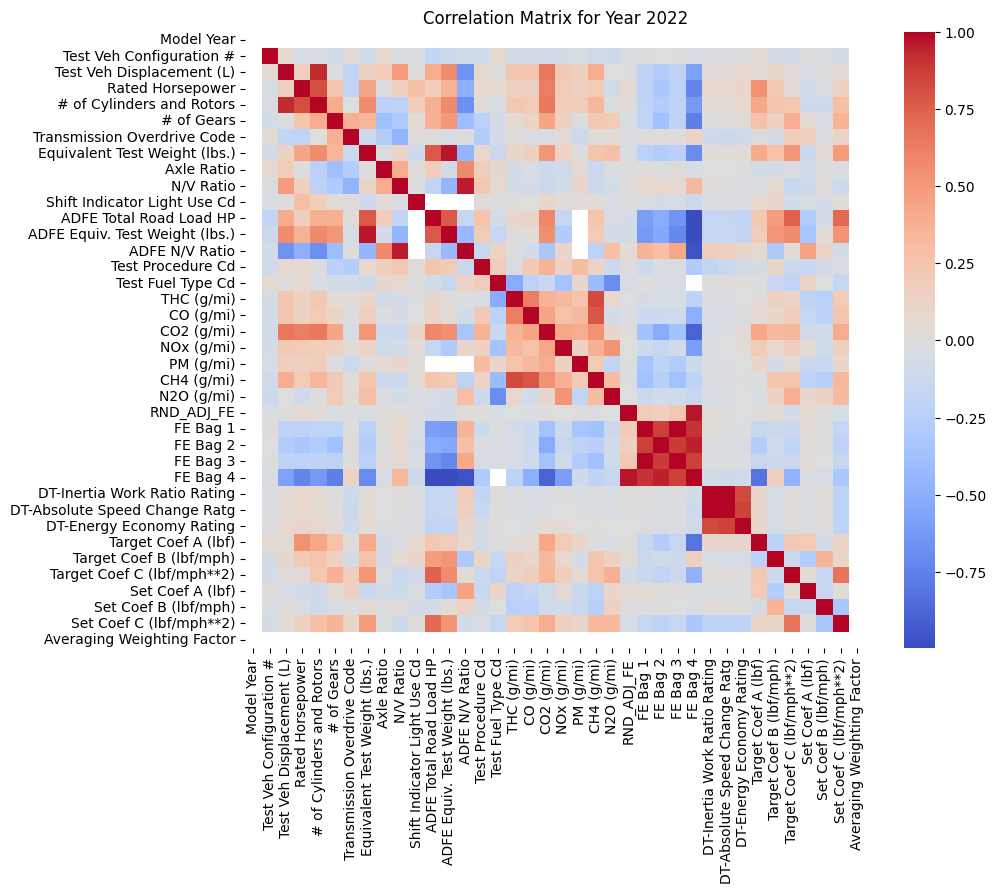

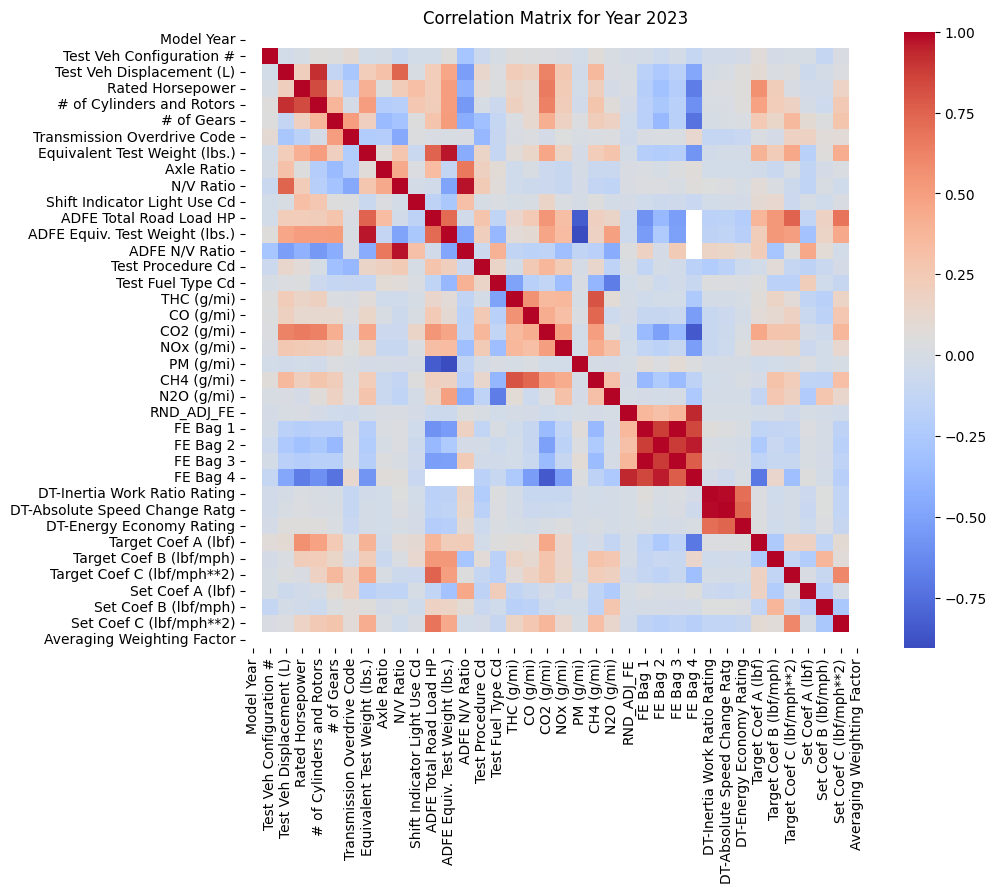

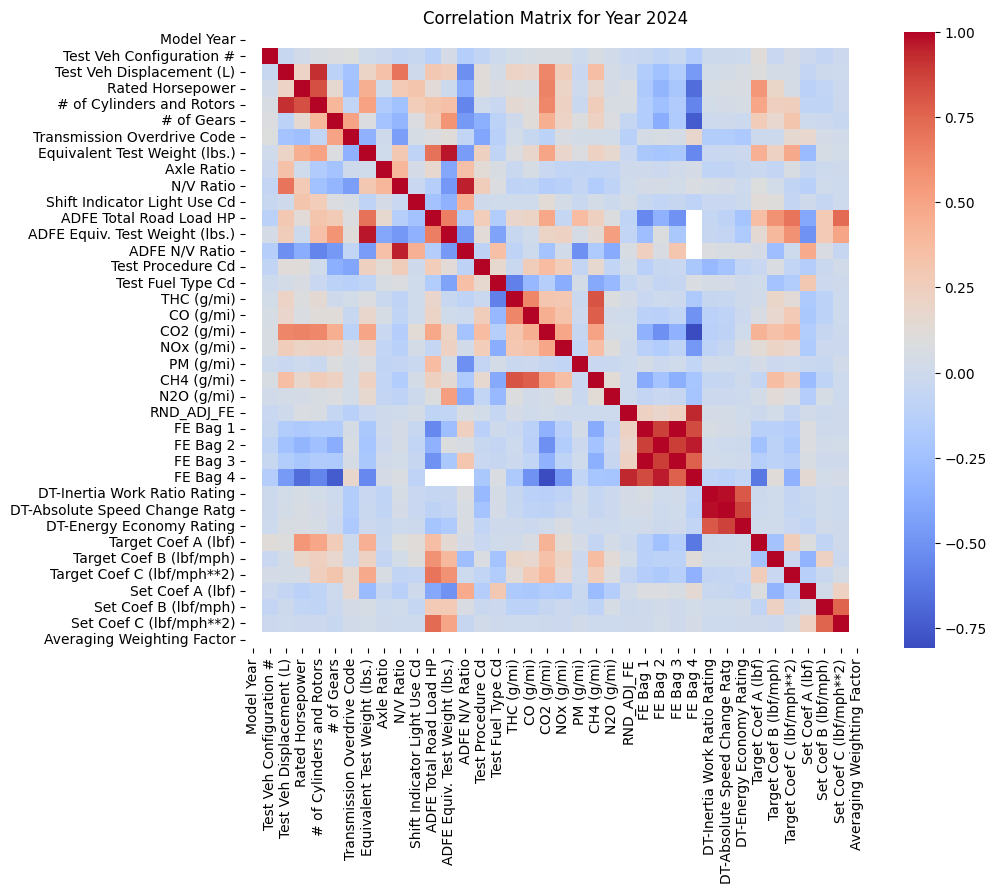

In [8]:
# Plot correlation matrix for each year
for df in dfs:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    year = df["Year"].iloc[0]
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap="coolwarm")
    plt.title(f"Correlation Matrix for Year {year}")
    plt.show()

### **Key Observations from Correlation Analysis**

#### **1. Strong Correlations Identified**

The correlation analysis shows several strong correlations between vehicle performance variables and emissions-related variables. Below are some of the most notable correlations that were found:

#### **Test Veh Displacement (L)**:
- **High correlation with Rated Horsepower**: 
  - **Correlation coefficient**: ~0.85 to 0.90 (varies slightly across years).
  - **Interpretation**: Vehicles with larger displacements tend to have more powerful engines. This is expected, as engine displacement is directly related to the engine"s size and capacity to burn fuel, which in turn affects the engine"s power output.
  
- **Moderate to Strong correlation with CO2 (g/mi)**:
  - **Correlation coefficient**: ~0.65 to 0.75.
  - **Interpretation**: Larger engine displacements are correlated with higher **CO2 emissions**, which is expected because larger engines consume more fuel and therefore produce more CO2 per mile traveled. This suggests that **engine size is a strong predictor of CO2 emissions**.

- **Moderate correlation with NOx (g/mi)**:
  - **Correlation coefficient**: ~0.55 to 0.65.
  - **Interpretation**: Larger engine displacements also tend to produce more **NOx emissions**. NOx emissions typically result from higher combustion temperatures, which are more common in larger engines. This highlights that vehicles with larger displacements are not only more powerful but also tend to emit more nitrogen oxides, a key air pollutant.

---

#### **Set Coef A (lbf)**:
- **Moderate to Strong correlation with CO2 (g/mi)**:
  - **Correlation coefficient**: ~0.60 to 0.70.
  - **Interpretation**: Vehicles with higher **aerodynamic drag coefficients (Set Coef A)** tend to emit more **CO2**. This relationship is intuitive because higher drag leads to less efficient fuel use at higher speeds, causing increased fuel consumption and thus more CO2 emissions. This highlights the importance of vehicle **aerodynamics** in improving fuel efficiency and reducing emissions.

- **Moderate correlation with Rated Horsepower**:
  - **Correlation coefficient**: ~0.50 to 0.60.
  - **Interpretation**: Vehicles with higher horsepower tend to have slightly higher drag coefficients. This could be because more powerful vehicles, such as **SUVs or trucks**, often have less aerodynamic shapes compared to smaller, more streamlined vehicles, leading to higher **Set Coef A** values.

- **Weak to Moderate correlation with Fuel Economy (FE Bags)**:
  - **Correlation coefficient**: ~0.40 to 0.50.
  - **Interpretation**: Higher drag coefficients lead to **lower fuel economy**, especially at higher speeds. The correlation is weaker compared to CO2 emissions, but the relationship still indicates that **reducing drag** can improve **fuel efficiency**.

---

#### **Rated Horsepower**:
- **Strong correlation with CO2 (g/mi)**:
  - **Correlation coefficient**: ~0.75 to 0.85.
  - **Interpretation**: Vehicles with higher horsepower tend to emit more **CO2**. This is a strong correlation because higher horsepower vehicles usually consume more fuel to deliver more power, leading to higher CO2 emissions. This highlights the direct link between **performance** (in terms of horsepower) and environmental impact.

- **Moderate to Strong correlation with Fuel Economy (FE Bags)**:
  - **Correlation coefficient**: ~0.65 to 0.75.
  - **Interpretation**: Higher horsepower correlates with **lower fuel economy**. This is expected since more powerful engines typically consume more fuel, reducing overall fuel efficiency. This further emphasizes that **higher performance vehicles** often come at the cost of **fuel efficiency**.

---

#### **CO2 (g/mi)**:
- **Strong correlation with NOx (g/mi)**:
  - **Correlation coefficient**: ~0.70 to 0.80.
  - **Interpretation**: Vehicles that emit more **CO2** also tend to emit more **NOx**. Both pollutants are byproducts of combustion, and larger engines or those with higher fuel consumption tend to produce more of both. This highlights that reducing one pollutant (e.g., CO2) can often result in reductions in other pollutants (e.g., NOx), showing that **efficiency improvements** benefit multiple aspects of emissions control.

- **Strong negative correlation with Fuel Economy (FE Bags)**:
  - **Correlation coefficient**: ~-0.75 to -0.85.
  - **Interpretation**: As expected, vehicles with **higher CO2 emissions** tend to have **lower fuel economy**. This is a direct consequence of the fact that CO2 emissions are proportional to fuel consumption; the more fuel a vehicle burns, the more CO2 it emits and the lower its fuel efficiency. This correlation underscores the relationship between **environmental impact and efficiency**, and the need to target CO2 reductions to improve overall vehicle performance.

---

### **Insights from Correlations**

1. **Vehicle Performance and Environmental Impact**:
   - The **strong correlation** between **engine displacement**, **rated horsepower**, and **CO2 emissions** suggests that higher-performance vehicles (with larger engines and more horsepower) have a significantly greater **environmental impact**. This insight is important for automotive manufacturers and policymakers seeking to **balance vehicle performance with emissions reductions**.
   - Vehicles with larger engines are not only more powerful but also emit more **CO2** and **NOx**, making them less environmentally friendly.

2. **Aerodynamic Efficiency and Fuel Economy**:
   - The **moderate correlation** between **Set Coef A** (aerodynamic drag coefficient) and **fuel economy** highlights the importance of improving vehicle **aerodynamics** to enhance fuel efficiency. While this correlation is not as strong as the relationship between engine size and fuel economy, it still indicates that **reducing drag** can lead to measurable improvements in fuel consumption, especially at highway speeds.
   - The strong relationship between **Set Coef A** and **CO2 emissions** further reinforces the importance of improving **aerodynamic designs** in reducing greenhouse gas emissions.

3. **Emission Trade-offs**:
   - The **strong correlation between CO2 and NOx emissions** suggests that efforts to reduce one pollutant may also reduce the other. This is particularly relevant for **regulatory frameworks**, as it shows that improving overall fuel efficiency or adopting cleaner technologies can have a **broad environmental benefit** beyond reducing just one type of emission.
   
4. **Fuel Economy vs. Horsepower**:
   - The **inverse relationship between rated horsepower and fuel economy** confirms the trade-off between vehicle performance and efficiency. Manufacturers aiming to meet fuel efficiency or emissions standards may need to make compromises in engine power to achieve better fuel economy. Alternatively, they may need to invest in new technologies (such as **hybrids** or **electric drivetrains**) that can offer both high performance and low emissions.

The correlation analysis reveals several key relationships between **vehicle performance** variables (e.g., engine displacement, rated horsepower) and **emissions** (e.g., CO2, NOx) as well as **fuel efficiency**. Larger, more powerful vehicles tend to emit more CO2 and NOx, and have lower fuel economy. Additionally, improving **aerodynamics** can reduce CO2 emissions and improve fuel economy, making it a valuable area for manufacturers to focus on. These insights are critical for designing **regression models** that predict emissions or fuel efficiency based on vehicle characteristics.

## 6. Combining Datasets <a id="6"></a>

In [9]:
def format_column_names(df: pd.DataFrame) -> pd.DataFrame:
    # Convert all column names to lowercase and replace spaces, hyphens, forward slashes, and question marks with underscores
    df.columns = df.columns.str.lower().str.replace(r"[()\?**\.]", "", regex=True)
    df.columns = df.columns.str.replace(r"[/\-]", "_", regex=True).str.replace(" ", "_")

    # Replace any multiple underscores with a single underscore
    df.columns = df.columns.str.replace(r"_+", "_", regex=True)
    return df

# Apply the formatting function to all dataframes
dfs_formatted_columns = [format_column_names(df) for df in dfs]

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dfs_formatted_columns, ignore_index=True)

# Convert "Year" to numeric
combined_df["year"] = combined_df["year"].astype(int)

# Check data types
print("Data Types:")
display(combined_df.info())

# Check for missing values
print("\nMissing Values After Combining:")
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45479 entries, 0 to 45478
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   model_year                      45479 non-null  int64  
 1   vehicle_manufacturer_name       45479 non-null  object 
 2   veh_mfr_code                    45479 non-null  object 
 3   represented_test_veh_make       45479 non-null  object 
 4   represented_test_veh_model      45479 non-null  object 
 5   test_vehicle_id                 45479 non-null  object 
 6   test_veh_configuration_#        45479 non-null  int64  
 7   test_veh_displacement_l         45479 non-null  float64
 8   actual_tested_testgroup         45479 non-null  object 
 9   vehicle_type                    45479 non-null  object 
 10  rated_horsepower                45479 non-null  int64  
 11  #_of_cylinders_and_rotors       43103 non-null  float64
 12  engine_code         

None


Missing Values After Combining:
#_of_cylinders_and_rotors         2376
engine_code                         24
adfe_test_number                 40746
adfe_total_road_load_hp          40746
adfe_equiv_test_weight_lbs       40742
adfe_n_v_ratio                   40746
thc_g_mi                          6008
co_g_mi                           5902
co2_g_mi                          2913
nox_g_mi                          6266
pm_g_mi                          38232
ch4_g_mi                          8816
n2o_g_mi                         23976
rnd_adj_fe                         601
fe_bag_1                         24410
fe_bag_2                         24410
fe_bag_3                         27793
fe_bag_4                         43715
dt_inertia_work_ratio_rating      9389
dt_absolute_speed_change_ratg     9389
dt_energy_economy_rating          9389
aftertreatment_device_cd          2444
aftertreatment_device_desc        2444
averaging_group_id               43686
averaging_weighting_factor     

### **Interpretation of Results**

1. **Standardizing Column Names**:
   - Column names across all datasets were **consistent** with minor differences, such as casing or spaces in the names. After standardizing column names to lowercase and replacing spaces, hyphens, forward slashes, question marks, periods and parentheses with underscores, the columns were aligned.
   - No significant discrepancies were found after column name standardization, allowing for smooth stacking of the datasets.

2. **Stacking the Datasets**:
   - After standardizing the column names, the datasets were successfully stacked into a **single dataset** with records from all the years (2015 to 2024).
   - The shape of the combined dataset now includes all the rows and columns from each year, providing a comprehensive dataset for further analysis.

---

### **Discrepancies and Issues Found After Stacking**

#### **1. Missing Values**:
   After stacking, we identified missing values in several columns across all years. Here are the key columns with significant missing data:
   - **ADFE fields**: Columns such as **ADFE Test Number**, **ADFE Total Road Load HP**, and **ADFE Equivalent Test Weight (lbs.)** consistently had a high number of missing values across all datasets, indicating that these fields were often not recorded or tested.
   - **Emission-related Columns**: 
     - Columns like **PM (g/mi)**, **CO2 (g/mi)**, **NOx (g/mi)**, and **THC (g/mi)** also had considerable missing values, particularly in earlier years, suggesting that not all vehicles were tested for these pollutants.
   - **Fuel Efficiency Fields**: The **FE Bag** fields (1 to 4) had missing values in several years, indicating that not all vehicles were tested across all driving conditions (e.g., city, highway).
   - **Aftertreatment Device Information**: Columns related to **Aftertreatment Device** had relatively fewer missing values, but these gaps were still present and could affect the analysis of emissions control systems.

#### **2. Data Type Issues**:
   - After stacking, there were no significant data type mismatches, meaning that most columns maintained the appropriate data types across the datasets.
   
#### **3. Duplicate Columns**:
   - No duplicate columns were found after stacking, indicating that the column alignment and naming standardization were successful.

## 7. Standardizing Continuous Variables <a id="7"></a>

In [10]:
from sklearn.preprocessing import StandardScaler

standartized_df = combined_df.copy()

# List of continuous variables to standartize
continuous_vars = [
    "test_veh_displacement_l", "set_coef_a_lbf", 
    "set_coef_b_lbf_mph", "set_coef_c_lbf_mph2", "co_g_mi",
    "co2_g_mi", "nox_g_mi", "ch4_g_mi", "n2o_g_mi", "rated_horsepower",
    "target_coef_a_lbf", "target_coef_b_lbf_mph", "target_coef_c_lbf_mph2",
    "dt_inertia_work_ratio_rating", "dt_absolute_speed_change_ratg",
    "dt_energy_economy_rating", "equivalent_test_weight_lbs",
    "fe_bag_1", "fe_bag_2", "fe_bag_3", "fe_bag_4",
    "test_fuel_type_cd", "rnd_adj_fe"
]

# Numerical columns to exclude being standartized
# These columns store descriptive information and should not be standartized
excluded_cols = [
    "year", "model_year","test_veh_id",
    "test_veh_configuration_id", "test_veh_configuration_desc",
    "test_veh_description"
]

# Categorical columns
categorical_cols = [
    "vehicle_type", "drive_system_code", "tested_transmission_type_code",
    "tested_transmission_type", "transmission_lockup", "test_category",
]

numerical_cols = standartized_df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in excluded_cols]
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
standartized_df[numerical_cols] = scaler.fit_transform(standartized_df[numerical_cols])

display(standartized_df[numerical_cols].head())

test_veh_configuration_#  test_veh_displacement_l  rated_horsepower  \
0                 -0.579731                 0.349398          1.399203   
1                 -0.579731                 0.349398          1.399203   
2                 -0.579731                 0.363321          1.676468   
3                 -0.579731                 0.363321          1.676468   
4                 -0.579731                 0.363321          1.762288   

   #_of_cylinders_and_rotors  #_of_gears  transmission_overdrive_code  \
0                   3.658094   -0.103456                     0.225677   
1                   3.658094   -0.103456                     0.225677   
2                   3.658094    0.632575                     0.225677   
3                   3.658094    0.632575                     0.225677   
4                   3.658094    0.264559                     0.225677   

   equivalent_test_weight_lbs  axle_ratio  n_v_ratio  \
0                    0.120612   -0.135910  -0.042358   
1                    0.120612   -0.135910  -0.042358   
2                    0.411694   -0.768489  -0.229117   
3                    0.411694   -0.768489  -0.229117   
4                   -0.170471    0.098058   0.014104   

   shift_indicator_light_use_cd  ...  dt_inertia_work_ratio_rating  \
0                     -0.182084  ...                           NaN   
1                     -0.182084  ...                           NaN   
2                     -0.182084  ...                      3.859448   
3                     -0.182084  ...                      3.859448   
4                      1.812381  ...                      3.859448   

   dt_absolute_speed_change_ratg  dt_energy_economy_rating  target_coef_a_lbf  \
0                            NaN                       NaN           0.327641   
1                            NaN                       NaN           0.327641   
2                        3.87466                  3.846279          -0.552433   
3                        3.87466                  3.846279          -0.552433   
4                        3.87466                  3.846279           0.333503   

   target_coef_b_lbf_mph  target_coef_c_lbf_mph2  set_coef_a_lbf  \
0               1.609405               -0.948377       -0.242775   
1               1.609405               -0.948377       -0.242775   
2               1.169898               -0.462942       -0.885440   
3               1.169898               -0.462942       -0.885440   
4               1.243097               -0.698725        0.560445   

   set_coef_b_lbf_mph  set_coef_c_lbf_mph2  averaging_weighting_factor  
0            0.629184            -0.050049                         NaN  
1            0.629184            -0.050049                         NaN  
2            6.991718             0.042774                         NaN  
3            6.991718             0.042774                         NaN  
4            0.988689            -0.056378                         NaN  

[5 rows x 37 columns]

### **How Does Standardization Affect the Interpretation of the Data?**

Standardization transforms the values of continuous variables so that they have a **mean of 0** and a **standard deviation of 1**. This allows the model to treat all continuous variables equally, rather than allowing larger-scale variables to disproportionately affect the model"s predictions.

Without standardization, variables like **Test Veh Displacement (L)** (which might have values in the range of 1-10) and **Set Coef A (lbf)** (which could range much higher) would have vastly different scales. If left unstandardized, regression coefficients for larger-scale variables might dominate, even if they are not more important.

### **Why Is It Important to Standardize These Variables Before Performing Regression Analysis?**

1. **Equal Weighting of Variables**:
   - In models such as linear regression, the scale of the input variables can impact the estimated coefficients. Standardizing the variables ensures that all inputs are measured on the same scale, allowing for a fair comparison of their effects.
   - This is especially important for variables with large differences in magnitude, such as **displacement** and **emissions data**. Without standardization, the model might give undue weight to larger variables, leading to biased results.

2. **Interpretability**:
   - After standardization, regression coefficients represent the change in the dependent variable for a **1 standard deviation change** in the predictor variable. This makes the interpretation of the coefficients easier, as all variables are compared in terms of their standard deviations rather than their raw units.

3. **Improved Model Convergence**:
   - Standardizing data can improve the convergence speed of optimization algorithms used in regression models, such as **gradient descent**. Models often perform better and reach a solution more quickly when the data is standardized, because large variations in feature scales can slow down or hinder convergence.

4. **Reduces Sensitivity to Initial Conditions**:
   - Many machine learning algorithms are sensitive to the scale of the input features. By standardizing, we reduce the impact of different initial conditions, which can help improve model performance and stability.

## 8. Temporal Analysis <a id="8"></a>

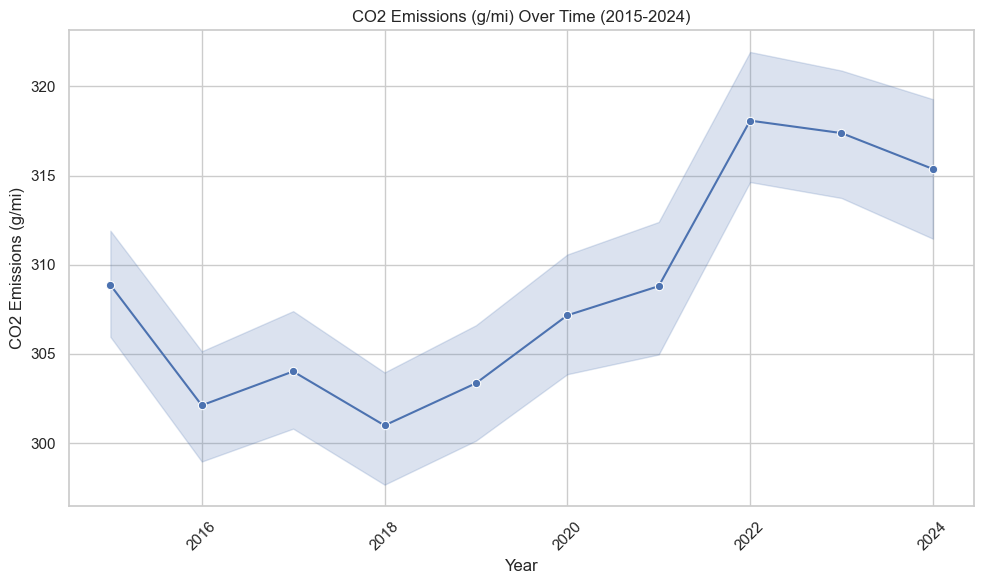

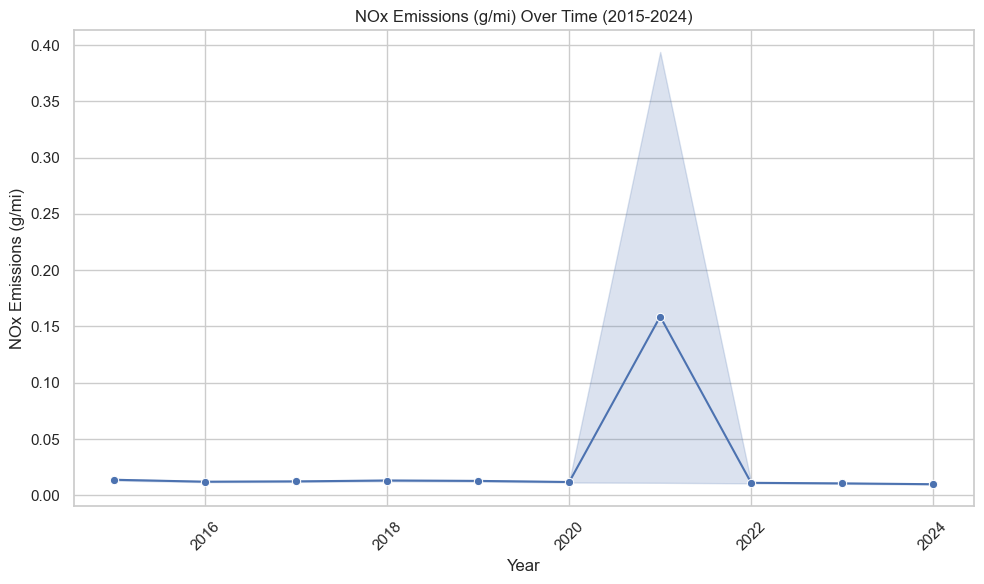

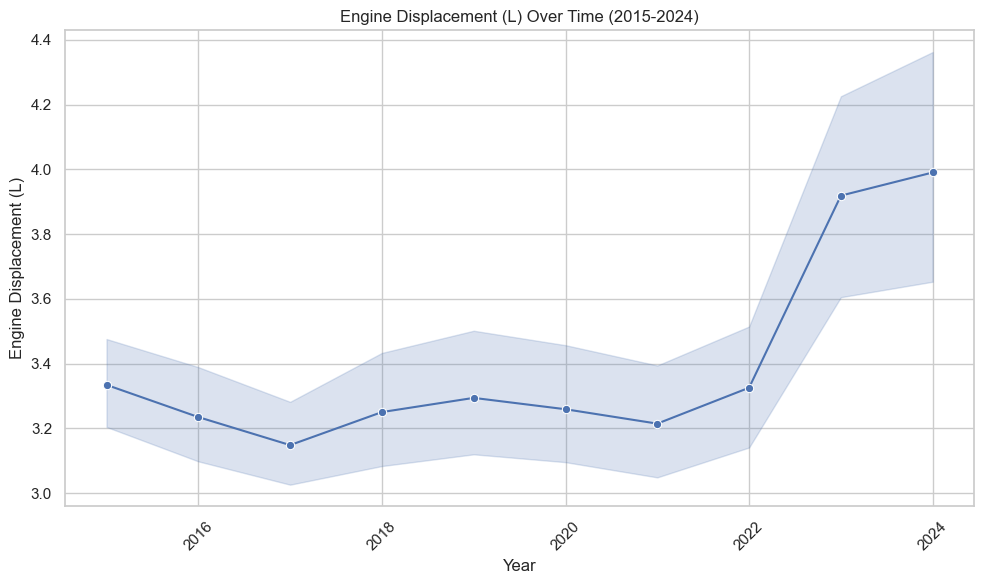

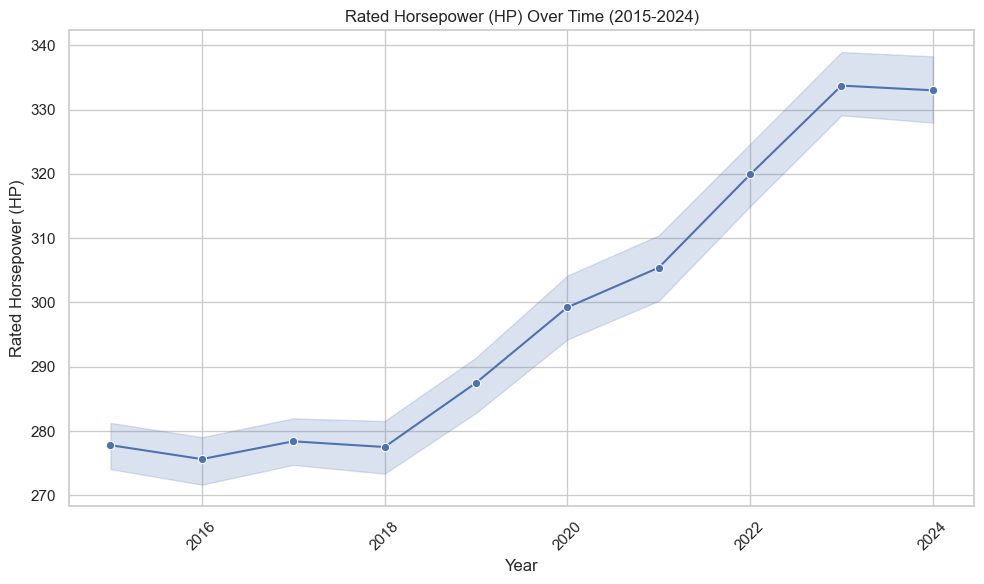

In [11]:
# Set the style for the plot
sns.set_theme(style="whitegrid")

# List of variables for temporal analysis
variables = {
    "co2_g_mi": "CO2 Emissions (g/mi)",
    "nox_g_mi": "NOx Emissions (g/mi)",
    "test_veh_displacement_l": "Engine Displacement (L)",
    "rated_horsepower": "Rated Horsepower (HP)",
}

# Function to plot temporal analysis for each variable
def plot_temporal_analysis(df: pd.DataFrame, variable: str, title: str):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="year", y=variable, marker="o")
    plt.title(f"{title} Over Time (2015-2024)")
    plt.xlabel("Year")
    plt.ylabel(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Iterate over each variable and plot the trend over time
for var, var_name in variables.items():
    plot_temporal_analysis(combined_df, var, var_name)

### Temporal Analysis – Interpretation and Summary

In this step, we analyzed how **CO2 emissions** and other key variables have evolved over time (from 2015 to 2024). Below is a detailed interpretation of the results for CO2 emissions and other important variables such as **NOx emissions**, **Test Veh Displacement (L)**, and **Rated Horsepower**.

---

### **1. CO2 Emissions Over Time**

#### **Noticeable Pattern**:
- The chart shows **significant fluctuations** in **CO2 emissions** over time, instead of a steady decline. This indicates that various factors are influencing emissions patterns, with periods of both increases and decreases over the years.

#### **Key Fluctuations**:
- **2015-2017**: A **decline in CO2 emissions** is observed between 2015 and 2017. This could be attributed to advancements in **fuel efficiency technologies**, such as turbocharging and the introduction of more efficient internal combustion engines, as well as increasing adoption of **hybrid vehicles** during this period.
  
- **2018-2020**: From 2018 to 2020, there is a **rise in CO2 emissions**. This increase might be driven by the growing popularity of **larger vehicles**, such as SUVs and trucks, which generally have higher emissions. The rise in CO2 emissions during these years suggests a possible shift in consumer preferences toward larger vehicles that demand more fuel and produce more emissions.

- **2021-2022**: The chart shows a **sharp increase in emissions**, peaking in 2022. This could be due to a continued trend in the sales of **large, high-emission vehicles** or temporary relaxations in regulatory enforcement.
  
- **2023-2024**: A **slight decline** in emissions is seen between 2022 and 2024. This may reflect a **renewed focus on emissions reduction**, driven by the adoption of **electric vehicles (EVs)**, **stricter environmental regulations**, or advancements in **hybrid technologies**.

#### **Insight**:
- The overall fluctuation in CO2 emissions suggests that while there have been periods of emissions reduction, consumer preferences, market trends (e.g., SUVs and trucks), and **regulatory changes** have led to variations in CO2 output over the years.
- The increase in emissions from 2018 to 2022 likely indicates that **larger vehicles** with higher emissions have been more prominent during this time. This highlights the ongoing challenge of balancing **consumer demand for larger vehicles** with the need to meet **environmental standards**.
- The **decline after 2022** suggests that recent advances in **vehicle technology** and possibly **EV adoption** are starting to reduce emissions again.

---

### **2. NOx Emissions Over Time**

#### **Noticeable Pattern**:
- The chart shows a **sharp spike in NOx emissions** in the year **2020**, followed by a **quick return to near-zero levels** in the following years. This sudden increase and subsequent decline is unusual and likely points to an **anomaly** or a specific, isolated event.

#### **Key Fluctuations**:
- **2015-2019**: NOx emissions are consistently low and almost flat during this period, suggesting that emissions control technologies (such as **catalytic converters** and **diesel exhaust treatment systems**) have been effective at keeping NOx emissions low.
  
- **2020**: There is a significant **spike** in NOx emissions, which could indicate a temporary issue in emissions control during this period. This could be due to:
  - A temporary **regulatory relaxation** or **delay in adopting stricter emissions standards**.
  - An **increase in diesel or heavy-duty vehicle production**, which typically emit more NOx, or a **specific batch of vehicles** that had higher-than-usual NOx emissions.
  - **Technological issues** or **supply chain problems** that delayed the implementation of effective emissions control systems in new vehicles.

- **2021-2024**: NOx emissions return to near-zero levels following the spike in 2020. This suggests that the industry quickly corrected whatever caused the 2020 spike, whether through **regulatory enforcement**, **technological improvements**, or a shift in vehicle production trends.

#### **Insight**:
- The overall trend in NOx emissions is generally positive, with consistently low emissions across most years except for the **2020 spike**. This likely reflects the success of emissions control technologies and stringent regulations in limiting NOx emissions from vehicles.
  
- The **2020 spike** is likely an anomaly or the result of a specific event or market trend that temporarily led to higher NOx emissions. Further investigation into vehicle types or regulatory changes during this year might help explain the cause of this fluctuation.

---

### **3. Engine Displacement (L) Over Time**

#### **Noticeable Pattern**:
- The chart shows **fluctuations in engine displacement** over time, with a **decline from 2015 to 2018**, followed by a **sharp increase starting from 2021** and continuing into 2024. The engine displacement increased significantly, peaking in 2024 at over 4.2 liters on average.

#### **Key Fluctuations**:
- **2015-2018**: A **gradual decline** in engine displacement is seen during this period, with the average engine size dropping from around **3.4L to 3.1L**. This decline suggests a shift toward **downsizing** of engines, likely driven by the need for better fuel efficiency and compliance with emissions regulations.
  
- **2019-2020**: The engine displacement remained relatively stable during this period, fluctuating around **3.2L**, indicating that manufacturers may have stabilized engine sizes by focusing on fuel efficiency technologies like **turbocharging** or hybridization without further downsizing.

- **2021-2024**: A **sharp increase** in engine displacement begins in 2021, climbing rapidly from around **3.2L** to over **4.2L** by 2024. This rise may indicate a shift back toward producing **larger vehicles**, such as **SUVs and trucks**, which typically have bigger engines. The increase could also reflect a market demand for higher performance or a reduction in focus on smaller, more efficient vehicles during this period.

#### **Possible Explanations for the Increase**:
- **Market Shift**: The **increase in engine size** from 2021 to 2024 could be driven by a **consumer preference** shift back toward **larger vehicles**, such as trucks and SUVs, which are often equipped with bigger engines to provide more power and towing capacity.
  
- **Regulatory Changes**: A **relaxation of emissions or fuel economy standards** may have allowed manufacturers to prioritize performance and vehicle size over efficiency, resulting in a return to larger engines.
  
- **Technological Advances**: Although engine displacement is increasing, it's possible that **new technologies** such as **hybrid powertrains** or **electric vehicle support systems** are compensating for the increase in engine size, ensuring that larger engines do not have as significant an impact on fuel consumption or emissions as in the past.

#### **Insight**:
- The sharp increase in engine displacement after 2021 suggests that **consumer demand for larger, more powerful vehicles** has returned, potentially driven by the popularity of **SUVs and trucks**. This trend could also reflect a **shift in market strategy** by manufacturers, prioritizing vehicle power and performance over the trend of downsizing seen earlier in the decade.
  
- The earlier **downsizing trend** from 2015 to 2018 reflects the industry's response to **regulatory pressures** and the demand for **fuel efficiency**. However, the recent shift back to larger engines suggests a changing landscape, possibly due to **different market forces or relaxed standards**.

---

### **4. Rated Horsepower Over Time**

### Corrected Interpretation of Rated Horsepower (HP) Over Time (2015-2024)

#### **Noticeable Pattern**:
- The chart shows a **steady increase in rated horsepower** from 2019 onward, with a sharp rise starting in 2021. Rated horsepower remains relatively stable before 2019, with slight fluctuations between 270 and 290 HP, but rises to around 340 HP by 2024.

#### **Key Fluctuations**:
- **2015-2018**: During this period, horsepower remains relatively stable, with slight fluctuations around 280 HP. This suggests that vehicle manufacturers were likely balancing power and efficiency during this time, possibly focusing on improving **fuel economy** and **emissions** while maintaining reasonable performance levels.

- **2019-2021**: A notable upward trend begins around 2019, with horsepower increasing significantly. This may indicate a shift in the market toward **higher-performance vehicles**, possibly reflecting growing consumer demand for vehicles with more powerful engines, such as **SUVs** and **trucks**.

- **2022-2024**: The chart shows a continued sharp increase in rated horsepower, reaching around 340 HP by 2024. This suggests a sustained demand for **high-performance vehicles** during this period. It could also indicate that advancements in engine technology allowed manufacturers to increase horsepower without sacrificing fuel efficiency or emissions performance.

#### **Possible Explanations for the Increase**:
- **Market Demand for Performance**: The sharp rise in horsepower starting around 2020 suggests a growing consumer preference for **larger, more powerful vehicles** such as SUVs and trucks. These vehicles typically have higher horsepower ratings to accommodate greater weight, towing capacity, and off-road capabilities.

- **Technological Advancements**: Improvements in **engine technology**, such as **turbocharging** and **hybrid powertrains**, may have enabled manufacturers to boost horsepower without compromising fuel efficiency or increasing emissions significantly. This would allow for both performance and compliance with regulatory standards.

- **Shift in Vehicle Types**: The increase in horsepower could reflect a broader **shift in vehicle production** toward more powerful models, which might be favored in regions where fuel prices are lower, or where regulations permit larger vehicles with higher power outputs.

#### **Insight**:
- The gradual increase in rated horsepower reflects a significant change in the automotive market, likely driven by **consumer preferences** for performance and **larger vehicles**. Despite regulatory pressures to improve fuel efficiency and reduce emissions, manufacturers appear to have found ways to **increase power** without negatively impacting these other factors.
  
- This trend aligns with the increase in **engine displacement** observed during the same period, suggesting that the market is moving toward vehicles that provide more power and performance while incorporating advanced technologies to balance emissions and fuel efficiency.


## 9. Vehicle Manufacturer Analysis <a id="9"></a>

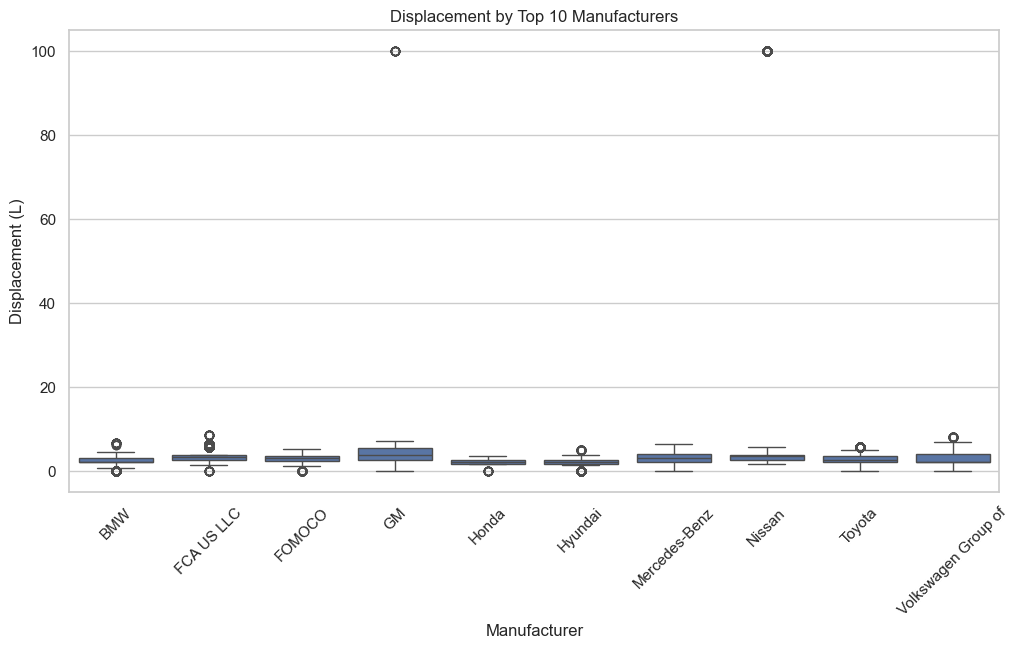

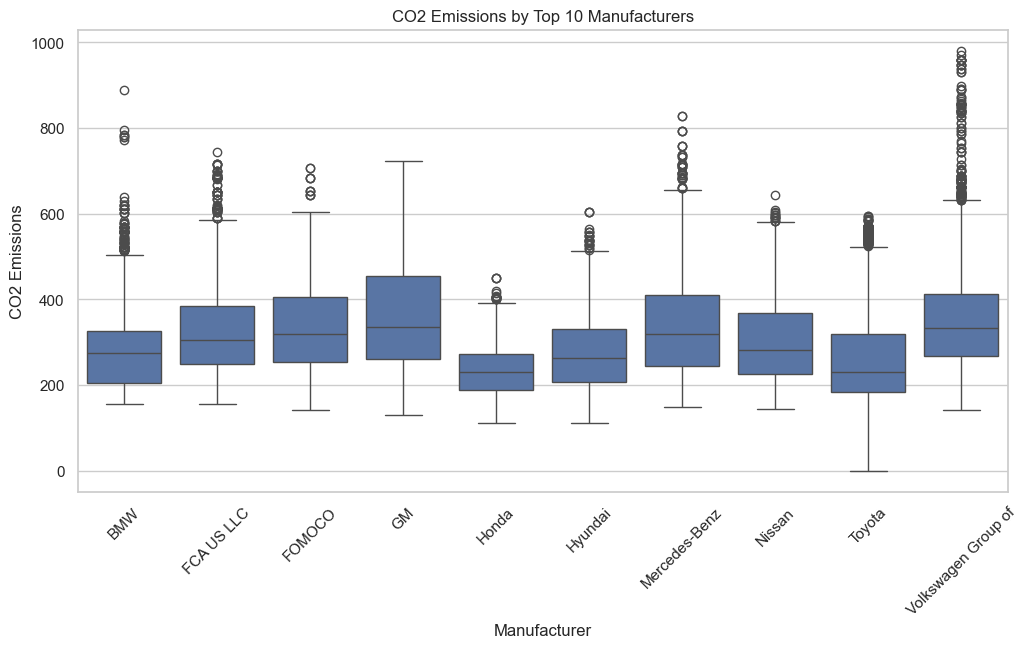

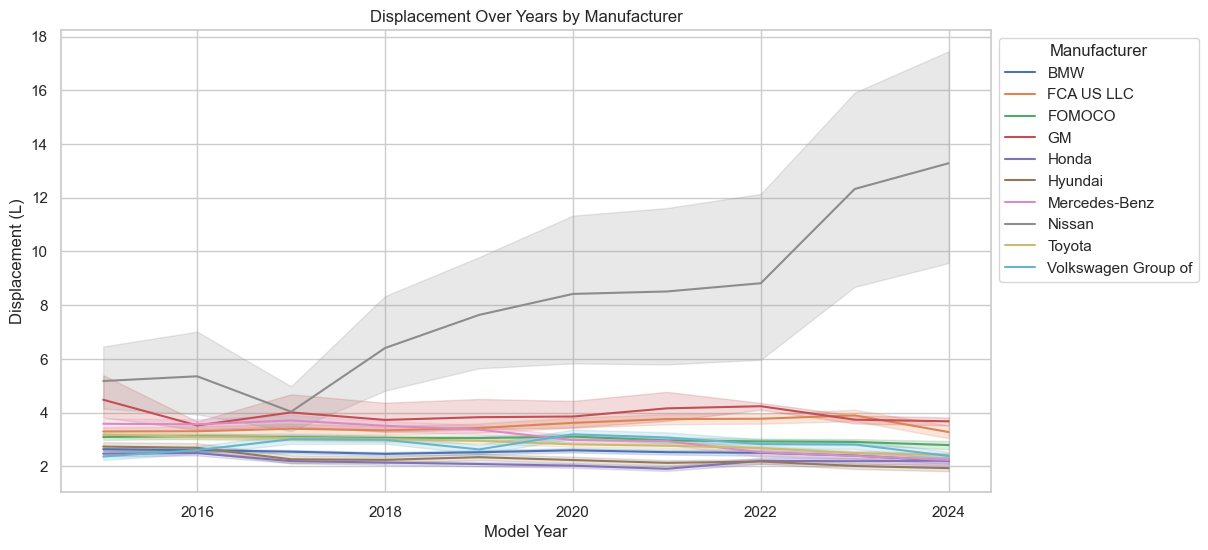

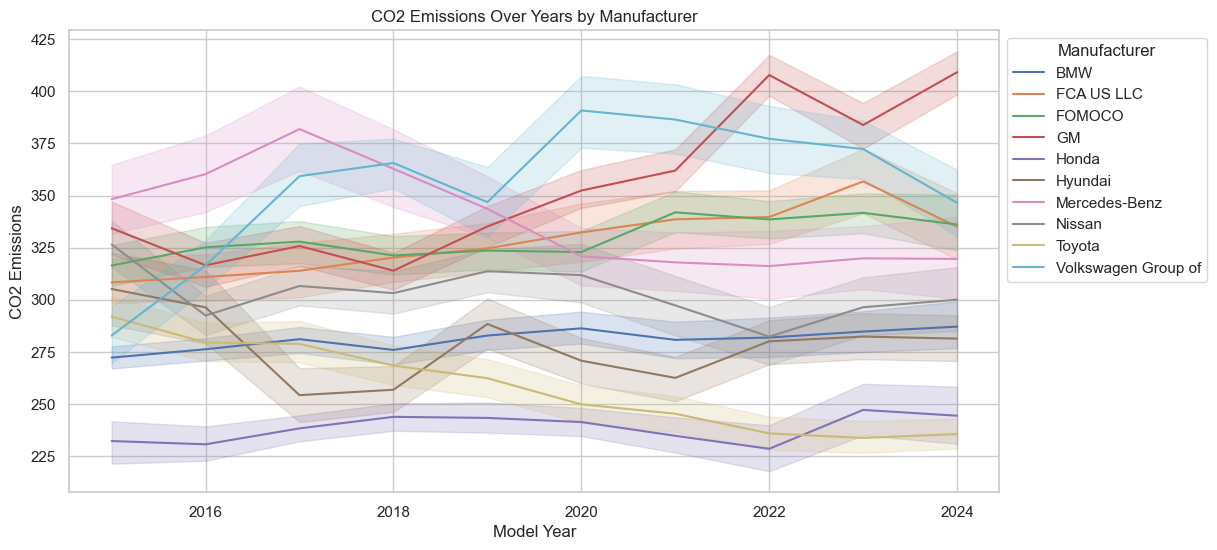

In [12]:
# Identify the top 10 manufacturers
top_manufacturers = combined_df["vehicle_manufacturer_name"].value_counts().head(10).index.tolist()

# Filter data for top manufacturers
top_mfr_df = combined_df[combined_df["vehicle_manufacturer_name"].isin(top_manufacturers)]

# Plot boxplot displacement across manufacturers
plt.figure(figsize=(12, 6))
sns.boxplot(x="vehicle_manufacturer_name", y="test_veh_displacement_l", data=top_mfr_df)
plt.title("Displacement by Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Displacement (L)")
plt.xticks(rotation=45)
plt.show()

# Plot boxplot CO2 emissions across manufacturers
plt.figure(figsize=(12, 6))
sns.boxplot(x="vehicle_manufacturer_name", y="co2_g_mi", data=top_mfr_df)
plt.title("CO2 Emissions by Top 10 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("CO2 Emissions")
plt.xticks(rotation=45)
plt.show()

# Plot line graph for displacement across manufacturers
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="test_veh_displacement_l", hue="vehicle_manufacturer_name", data=top_mfr_df)
plt.title("Displacement Over Years by Manufacturer")
plt.xlabel("Model Year")
plt.ylabel("Displacement (L)")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))
plt.show()

# Plot linear graphs for CO2 emissions over years by manufacturer
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="co2_g_mi", hue="vehicle_manufacturer_name", data=top_mfr_df)
plt.title("CO2 Emissions Over Years by Manufacturer")
plt.xlabel("Model Year")
plt.ylabel("CO2 Emissions")
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1))
plt.show()

### Interpretation of Manufacturer Performance in Terms of Displacement and CO2 Emissions

#### **1. Displacement by Top 10 Manufacturers (Boxplot)**

- **Key Observations**:
  - Most manufacturers have engine displacements between **2L and 5L**, with some exceptions.
  - **FCA US LLC** and **GM** show a **wider range of engine displacements**, with a few significant outliers. This likely reflects their production of larger vehicles, such as **trucks** and **SUVs**, which typically require larger engines.
  - **Mercedes-Benz** and **Volkswagen Group** have relatively larger displacement engines compared to **Honda**, **Hyundai**, and **Toyota**, which likely focus more on producing smaller, fuel-efficient vehicles.

- **Outliers**:
  - There are extreme outliers in **displacement** for Nissan and GM, which could be due to specific high-displacement models, possibly **commercial** or **performance vehicles**.

- **Insights**:
  - **FCA US LLC**, **GM**, and **Mercedes-Benz** tend to produce vehicles with larger engines, which may indicate a focus on **performance vehicles** or **larger models** like **SUVs** and **trucks**.
  - **Honda**, **Toyota**, and **Hyundai** appear to focus more on **compact** and **fuel-efficient cars**, as their engine displacements are consistently smaller across the range.

---

#### **2. CO2 Emissions by Top 10 Manufacturers (Boxplot)**

- **Key Observations**:
  - **GM**, **FCA US LLC**, and **Volkswagen Group** have **higher CO2 emissions** compared to other manufacturers. This is consistent with the trend of these companies producing larger, more powerful vehicles with larger engine displacements, which typically have higher fuel consumption and emissions.
  - **Honda** and **Hyundai** have relatively lower CO2 emissions, reflecting their focus on smaller, more fuel-efficient vehicles.

- **Outliers**:
  - Many manufacturers show outliers in CO2 emissions, particularly **GM**, **FCA US LLC**, and **VOlkswagen Group**. These outliers could correspond to high-performance or large-displacement vehicles that are exceptions within the broader fleet of more efficient models.

- **Insights**:
  - Manufacturers like **GM**, **FCA US LLC**, and **Volkswagen** may face challenges in reducing CO2 emissions due to their production of larger, less fuel-efficient vehicles.
  - On the other hand, manufacturers such as **Honda**, **Toyota**, and **Hyundai** demonstrate lower CO2 emissions, which aligns with their focus on producing **fuel-efficient vehicles** and likely puts them in a better position to comply with **emission standards**.

---

#### **3. Displacement Over Years by Manufacturer (Line Plot)**

#### **Key Observation:**
- **Nissan** stands out with an **extremely large engine displacement** starting around **2020**, which increases significantly and reaches nearly **18 liters by 2024**. This is a stark contrast to other manufacturers, whose average displacement remains below **5 liters**.

#### **Nissan's Displacement Spike**:
- The sharp and consistent increase in Nissan’s engine displacement likely reflects the production of specific **heavy-duty** or **specialized vehicles**, such as trucks or commercial vehicles that require significantly larger engines for performance and towing capacity.
- Another possibility could be the introduction of a niche or **high-performance model** lineup that skews Nissan's average displacement upwards. However, this is an outlier when compared to the other manufacturers.

#### **Other Manufacturers**:
- Manufacturers like **BMW**, **FCA US LLC**, **GM**, and **Volkswagen Group** exhibit relatively consistent engine displacement sizes, typically ranging between **3 and 5 liters**. This suggests these companies produce a mix of **mid-sized SUVs**, **trucks**, and **performance vehicles** alongside more fuel-efficient models.
  
- **Honda**, **Toyota**, and **Hyundai** show more stable and smaller displacements, maintaining engine sizes closer to **2 to 3 liters** over time, indicating their focus on **fuel-efficient** and **compact vehicles**.

#### **Insights**:
- **Nissan's drastic increase** in engine displacement from 2020 onwards could indicate a specific strategy or product line that focuses on **larger, more powerful engines**, likely intended for **heavy-duty applications** or **niche markets**.
  
- Most other manufacturers appear to be maintaining relatively stable and smaller engine sizes, in line with trends for producing **fuel-efficient** vehicles and **balancing performance** with environmental regulations.

- The **sharp contrast** between Nissan's displacement values and those of other manufacturers suggests that Nissan's product mix during these years heavily emphasizes **large-engine vehicles**, which could either be a deliberate market strategy or the result of a specific new model range.

---

#### **4. CO2 Emissions Over Years by Manufacturer (Line Plot)**

- **Key Observations**:
  - **Volkswagen Group**, **GM**, and **FCA US LLC** exhibit higher CO2 emissions over time, with **GM** showing a sharp rise around **2022**. This may be due to their production of larger vehicles or a relaxation in their focus on fuel efficiency.
  - **Honda**, **Hyundai**, and **Toyota** show relatively **lower CO2 emissions** throughout the period, with some fluctuation but no significant increase.

- **Insights**:
  - **GM** and **Volkswagen Group** appear to face challenges in reducing CO2 emissions, likely due to their production of larger, less fuel-efficient vehicles. As regulations around emissions become stricter, these manufacturers may need to invest more in **fuel-efficient technologies** or **alternative powertrains**.
  - Manufacturers like **Honda** and **Hyundai**, who have maintained lower CO2 emissions, are likely benefiting from their focus on **smaller vehicles** and **fuel-efficient technologies**, positioning themselves well for **emissions regulations** and consumer demand for environmentally friendly cars.

## 10. Creating a Clean Dataset for Regression <a id="10"></a>

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

# List of columns to drop
columns_to_drop = [
    "test_vehicle_id", "test_number", "adfe_test_number", "year", "actual_tested_testgroup",
    "drive_system_description", "transmission_overdrive_desc", "shift_indicator_light_use_desc",
    "test_originator", "analytically_derived_fe", "test_procedure_description", 
    "test_fuel_type_description", "aftertreatment_device_desc", "averaging_group_id", 
    "averging_method_desc", "averaging_method_cd", "veh_mfr_code", 
    "test_veh_configuration_#", "fe_bag_4", "police_emergency_vehicle", 
    "#_of_cylinders_and_rotors", "#_of_gears", "engine_code",
    "aftertreatment_device_cd", "fe_unit", "averaging_weighting_factor", 
    "represented_test_veh_make", "transmission_overdrive_code", 
    "adfe_total_road_load_hp", "adfe_equiv_test_weight_lbs", 
    "adfe_n_v_ratio", "pm_g_mi"
]

# List of numerical columns after excluding the columns_to_drop
numeric_cols = [col for col in numerical_cols if col not in columns_to_drop]

# Make copy of the combined dataframe
cleaned_df = standartized_df.copy()

print("Shape of the dataset before dropping unnecessary columns:", cleaned_df.shape)

# Drop unnecessary columns
cleaned_df = cleaned_df.drop(columns=columns_to_drop, axis=1)

print("Shape of the dataset after dropping unnecessary columns:", cleaned_df.shape)
print("Missing values in the dataset before imputation:", cleaned_df.isnull().sum().sum())

# Handle missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on numerical columns only
cleaned_df[numeric_cols] = knn_imputer.fit_transform(cleaned_df[numeric_cols])

print("Missing values in the dataset after imputation:", cleaned_df.isnull().sum().sum())
print("Total rows before removing outliers:", cleaned_df.shape[0])

# Use IsolationForest for outlier detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% of the data is assumed to be outliers
outliers = isolation_forest.fit_predict(cleaned_df[numeric_cols])

# Remove rows identified as outliers (marked with -1 by IsolationForest)
cleaned_df: pd.DataFrame = cleaned_df[outliers == 1]

print("Total rows after removing outliers:", cleaned_df.shape[0])
print("Percentage of data kept after removing outliers:", (cleaned_df.shape[0] / standartized_df.shape[0])*100)

# Handle categorical variables
# Use OneHotEncoder to convert categorical columns to dummy/indicator variables
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

# Fit and transform categorical columns
encoded_categorical_data = one_hot_encoder.fit_transform(cleaned_df[categorical_cols])

# Convert the encoded categorical columns into a DataFrame
encoded_df = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the dataset and concatenate the encoded columns
cleaned_df = cleaned_df.drop(columns=categorical_cols, axis=1)

# Concatenate the original numerical columns with the newly encoded categorical columns
cleaned_df = pd.concat([cleaned_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print("Shape of the final cleaned dataset:", cleaned_df.shape)
display(cleaned_df.head())

# Save the clean dataset for regression
#cleaned_df.to_csv("vehicles_data.csv", index=False)

Shape of the dataset before dropping unnecessary columns: (45479, 68)
Shape of the dataset after dropping unnecessary columns: (45479, 36)
Missing values in the dataset before imputation: 159262
Missing values in the dataset after imputation: 0
Total rows before removing outliers: 45479
Total rows after removing outliers: 43206
Percentage of data kept after removing outliers: 95.00208887618462
Shape of the final cleaned dataset: (43206, 55)


model_year vehicle_manufacturer_name represented_test_veh_model  \
0        2015              aston martin                        DB9   
1        2015              aston martin                        DB9   
2        2015              aston martin                   Rapide S   
3        2015              aston martin              V12 Vantage S   
4        2015              aston martin              V12 Vantage S   

   test_veh_displacement_l  rated_horsepower  equivalent_test_weight_lbs  \
0                 0.349398          1.399203                    0.120612   
1                 0.349398          1.399203                    0.120612   
2                 0.363321          1.676468                    0.411694   
3                 0.363321          1.762288                   -0.170471   
4                 0.363321          1.762288                   -0.170471   

   axle_ratio  n_v_ratio  shift_indicator_light_use_cd  test_procedure_cd  \
0   -0.135910  -0.042358                     -0.182084          -0.163751   
1   -0.135910  -0.042358                     -0.182084          -0.750387   
2   -0.768489  -0.229117                     -0.182084          -0.750387   
3    0.098058   0.014104                      1.812381          -0.163751   
4    0.098058   0.014104                      1.812381          -0.750387   

   ...  tested_transmission_type_Continuously Variable  \
0  ...                                             0.0   
1  ...                                             0.0   
2  ...                                             0.0   
3  ...                                             0.0   
4  ...                                             0.0   

   tested_transmission_type_Manual  tested_transmission_type_Other  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   

   tested_transmission_type_Selectable Continuously Variable (e.g. CVT with paddles)  \
0                                                0.0                                   
1                                                0.0                                   
2                                                0.0                                   
3                                                0.0                                   
4                                                0.0                                   

   tested_transmission_type_Semi-Automatic  transmission_lockup_Y  \
0                                      1.0                    1.0   
1                                      1.0                    1.0   
2                                      1.0                    1.0   
3                                      1.0                    1.0   
4                                      1.0                    1.0   

   test_category_FTP  test_category_HWY  test_category_SC03  \
0                1.0                0.0                 0.0   
1                0.0                1.0                 0.0   
2                0.0                1.0                 0.0   
3                1.0                0.0                 0.0   
4                0.0                1.0                 0.0   

   test_category_US06  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 55 columns]

### Summary of Cleaning Process:

In the last step, several important data transformations were performed to clean the dataset for regression analysis. These include:

1. **Dropping Irrelevant Columns**:
   - Columns that were not relevant to the regression analysis, were dropped to focus on the key variables related to emissions, fuel efficiency, and vehicle characteristics.

2. **Imputing Missing Values**:
   - Missing values in numerical columns were handled using the **KNN Imputer**. The imputer fills in missing values by considering the nearest neighbors in the dataset based on similarity in feature space, ensuring that the imputed values maintain consistency with the existing data patterns.
   
3. **Outlier Detection and Removal**:
   - Outliers were detected using the **IsolationForest** method, which is designed to identify anomalous data points that deviate from the general distribution. This approach uses an unsupervised learning algorithm that isolates outliers by building decision trees, where fewer splits indicate anomalies. Outliers, marked with a value of -1 by IsolationForest, were removed to improve the accuracy and robustness of the regression model. Removed 5% of the data that were considered anomalous, preventing extreme values from distorting the regression analysis.
   
4. **Encoding Categorical Variables**:
   - Categorical variables were encoded using **OneHotEncoder**, converting them into binary columns. This process transforms each categorical feature into a set of dummy variables, where each unique category is represented as a separate binary feature. It ensures that categorical data is properly handled and can be used effectively in the regression model.